In [ ]:
# To import functions required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
import missingno as msno

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn import linear_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#To read the data
app_train_pd = pd.read_csv('/content/drive/MyDrive/home-credit-default-risk/application_train.csv')
app_test_pd = pd.read_csv('/content/drive/MyDrive/home-credit-default-risk/application_test.csv')
bu_pd = pd.read_csv('/content/drive/MyDrive/home-credit-default-risk/bureau.csv')

In [ ]:
#putting the data in dataframe
app_train_df = pd.DataFrame(app_train_pd)
app_test_df = pd.DataFrame(app_test_pd)
bu_df = pd.DataFrame(bu_pd)

In [ ]:
#To check the dataframe header and first 5 rows of data
app_train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
app_train_df.shape

(307511, 122)

### **Categorial** **EDA**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


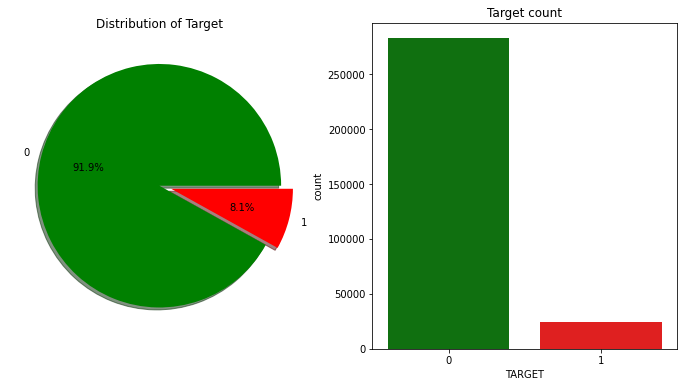

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,6))
app_train_df.TARGET.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors = ['green', 'red'])
ax[0].set_title('Distribution of Target')
ax[0].set_ylabel('')

sns.countplot('TARGET',data=app_train_df,ax=ax[1],palette = ['green', 'red'])
ax[1].set_title('Target count')
plt.show()

Correlation Analysis as above can only analyze attributes with numeric type. Meanwhile, object-type data may could be a good feature too. So we want to visualize distribution of some object-typed attribute on TARGET=0 and TARGET=1.

In [ ]:
app_train_df['OCCUPATION_TYPE'].nunique()

18

In [ ]:
app_train_df.shape

(307511, 122)

#### we want to know occupation type are able to repay on time and make better clients for company to borrow money to them

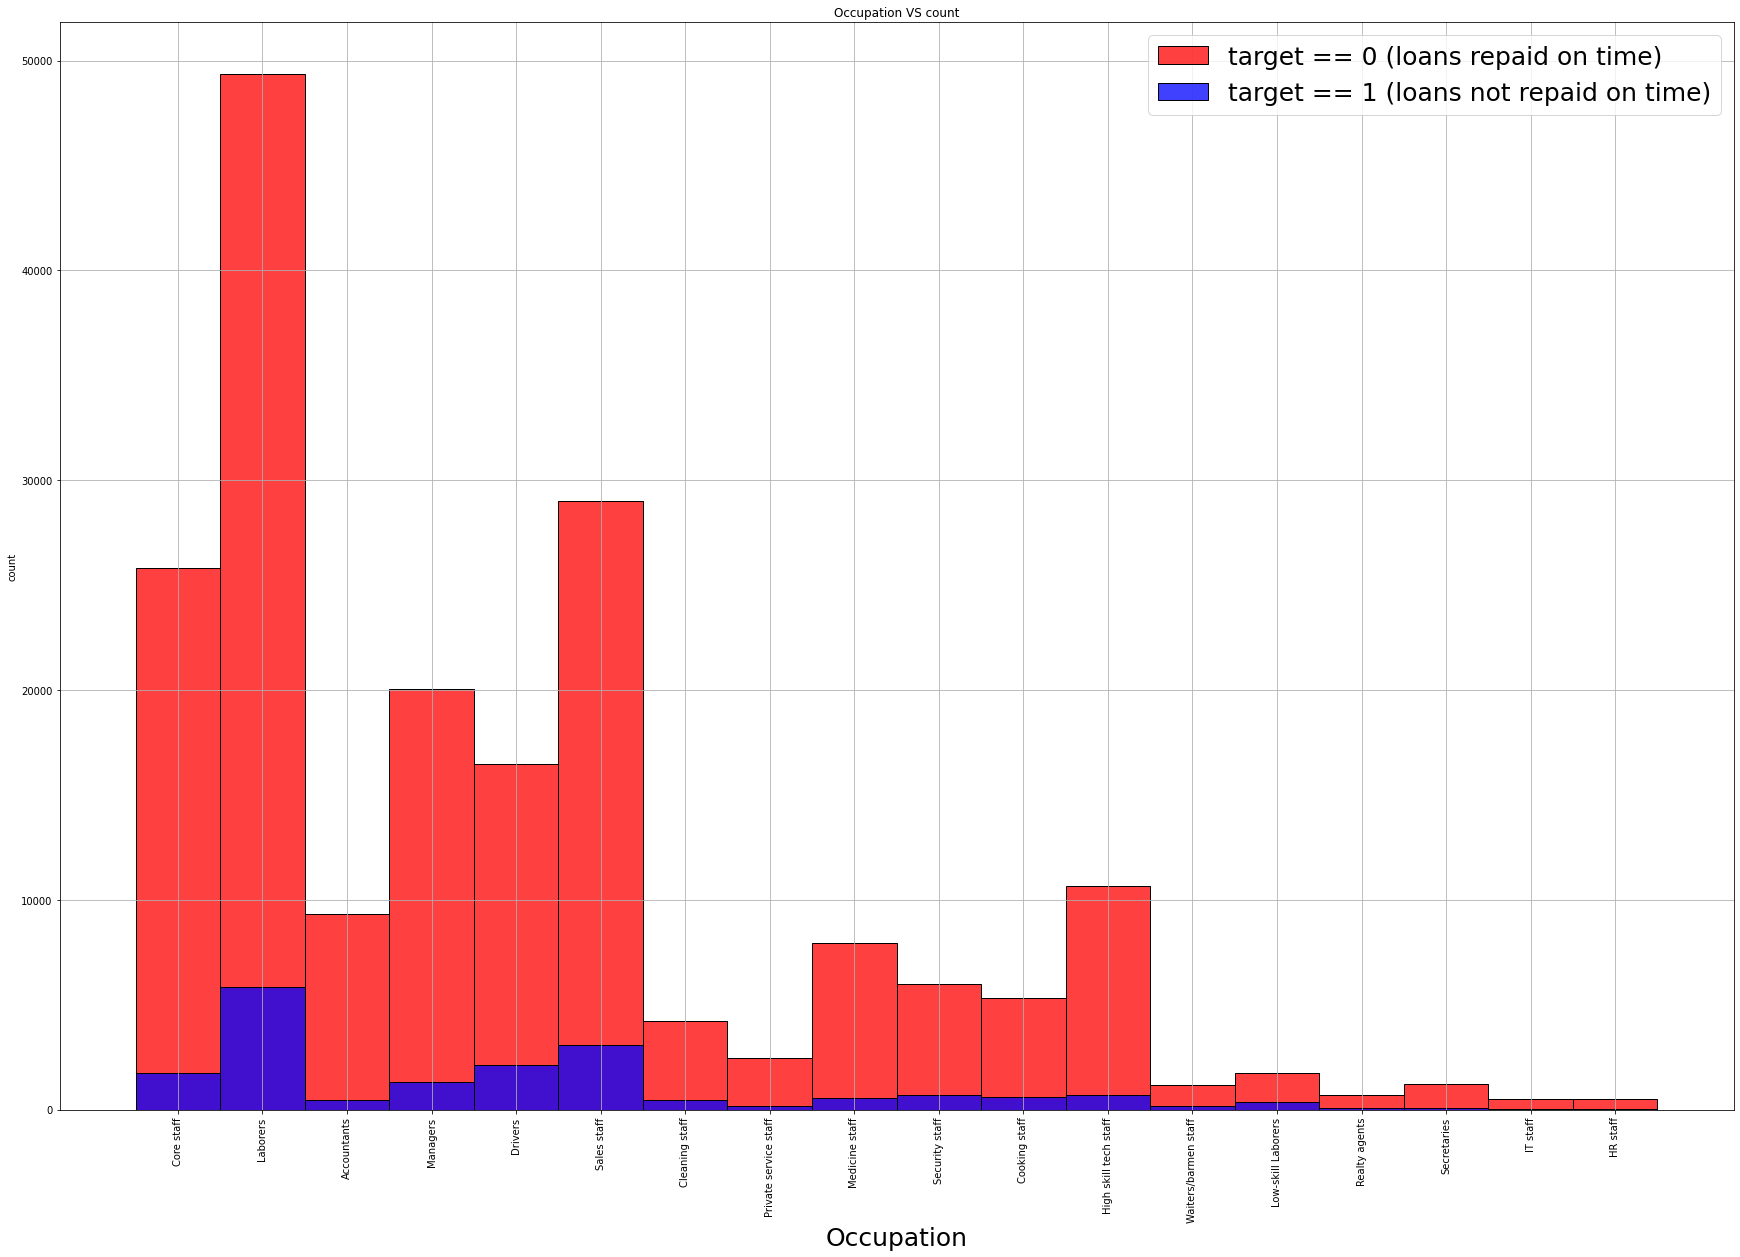

In [ ]:
plt.figure(figsize = (30, 20))

# hist plot of loans that were repaid on time
sns.histplot(app_train_df.loc[app_train_df['TARGET'] == 0, 'OCCUPATION_TYPE'] , label = 'target == 0 (loans repaid on time)', color= 'r')

# hist plot of loans which were not repid on time
sns.histplot(app_train_df.loc[app_train_df['TARGET'] == 1, 'OCCUPATION_TYPE'],label = 'target == 1 (loans not repaid on time)', color ='b')

# Labeling of plot
plt.legend(loc = 'upper right', fontsize = 25)
plt.xlabel('Occupation', fontsize = 25)
plt.ylabel('count')
plt.title('Occupation VS count')
plt.xticks(rotation=90)
plt.grid();

#### we want to know family status verses whether they can repay loan.

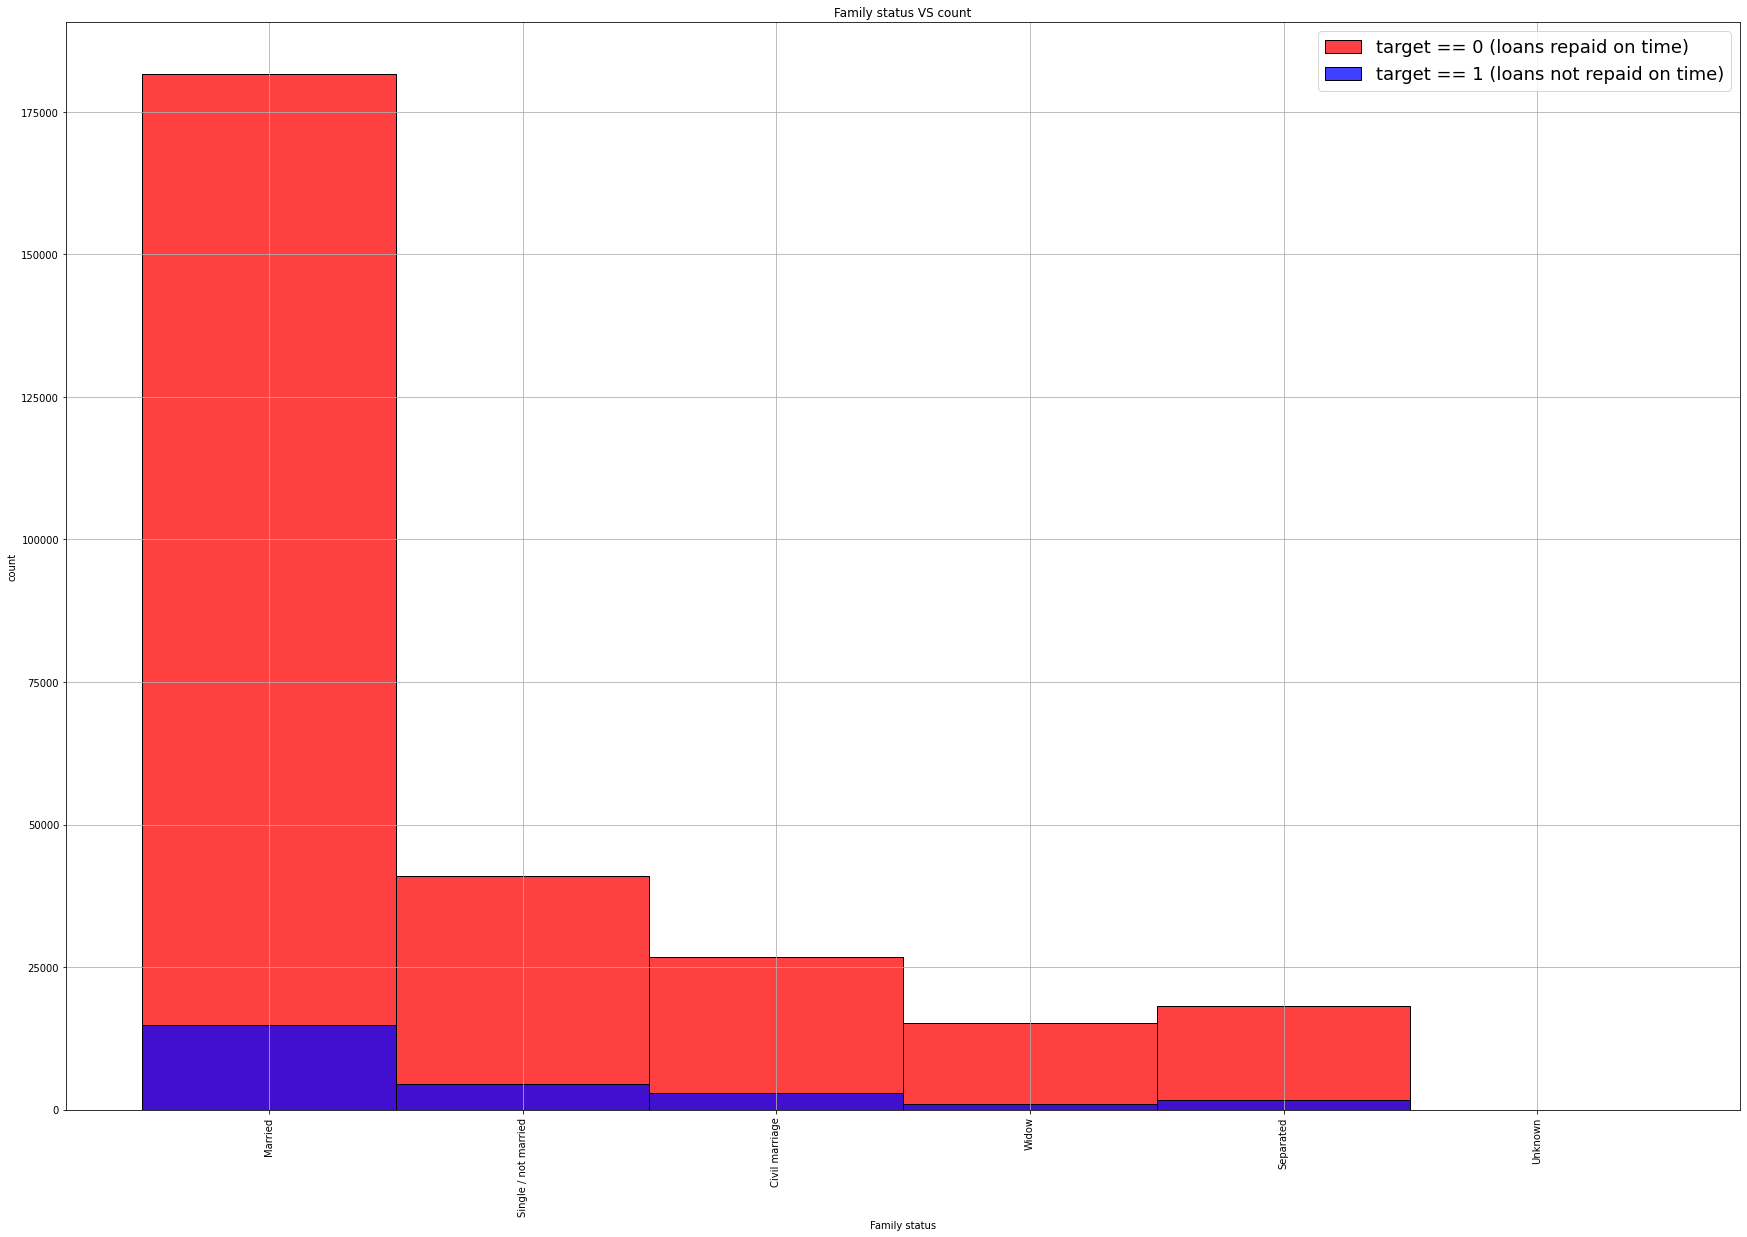

In [ ]:
plt.figure(figsize = (30, 20))

# hist plot of loans that were repaid on time
sns.histplot(app_train_df.loc[app_train_df['TARGET'] == 0, 'NAME_FAMILY_STATUS'] , label = 'target == 0 (loans repaid on time)', color= 'r')

# hist plot of loans which were not repid on time
sns.histplot(app_train_df.loc[app_train_df['TARGET'] == 1, 'NAME_FAMILY_STATUS'], label = 'target == 1 (loans not repaid on time)', color ='b')

# Labeling of plot
plt.legend(loc = 'upper right', fontsize = 18)
plt.xlabel('Family status')
plt.ylabel('count')
plt.title('Family status VS count')
plt.xticks(rotation=90)
plt.grid();

#### we want to know who are the major borrowers based on occupation types.

Text(0, 0.5, 'Occupation Type')

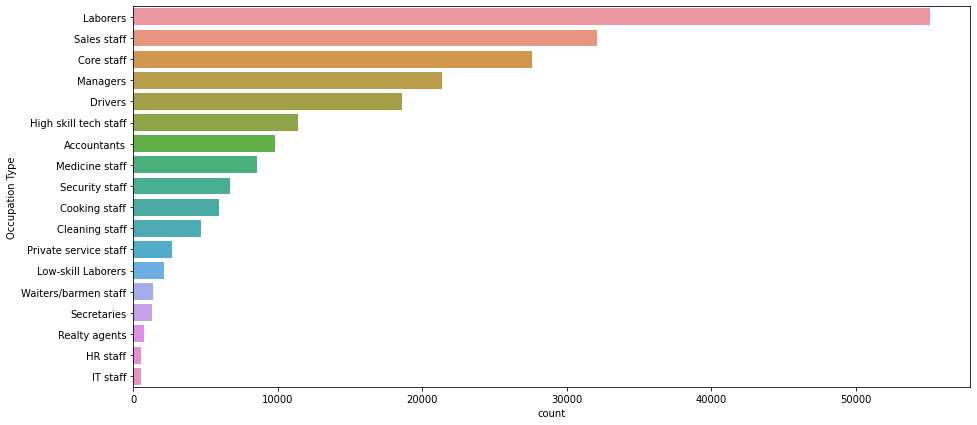

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(y='OCCUPATION_TYPE',data=app_train_df,order = app_train_df['OCCUPATION_TYPE'].value_counts().index)
plt.ylabel("Occupation Type")
#plt.yticks(rotation=270)

Text(0.5, 0, 'Average Annual family income')

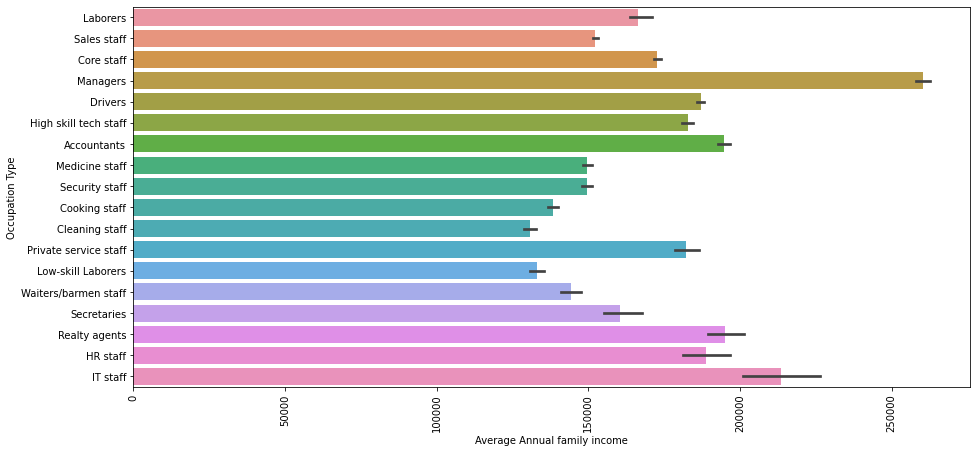

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(y='OCCUPATION_TYPE',x='AMT_INCOME_TOTAL',data=app_train_df,order = app_train_df['OCCUPATION_TYPE'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel("Occupation Type")
plt.xlabel("Average Annual family income")

### from above, we can tell from Occupation Type, the number of labourers could be deemed bias due to its population of people working as labourers verses remaining occupation type. Hence, we would need to convert the population into ratio instead 

In [ ]:
# determine number of occupation types people who meets and does not meet target
occupation_df = pd.DataFrame(data=app_train_df.groupby(['OCCUPATION_TYPE','TARGET']).count()['SK_ID_CURR']).reset_index()
occupation_df


,OCCUPATION_TYPE,TARGET,SK_ID_CURR
0,Accountants,0,9339
1,Accountants,1,474
2,Cleaning staff,0,4206
3,Cleaning staff,1,447
4,Cooking staff,0,5325
5,Cooking staff,1,621
6,Core staff,0,25832
7,Core staff,1,1738
8,Drivers,0,16496
9,Drivers,1,2107


In [ ]:
occupation_test_df = pd.DataFrame(data=app_test_df.groupby(['OCCUPATION_TYPE']).count()['SK_ID_CURR']).reset_index()
occupation_test_df

,OCCUPATION_TYPE,SK_ID_CURR
0,Accountants,1628
1,Cleaning staff,656
2,Cooking staff,894
3,Core staff,4361
4,Drivers,2773
5,HR staff,104
6,High skill tech staff,1854
7,IT staff,81
8,Laborers,8655
9,Low-skill Laborers,272


In [ ]:
# determine values group as an array
value_counts = occupation_df['SK_ID_CURR'].values
value_counts

array([ 9339,   474,  4206,   447,  5325,   621, 25832,  1738, 16496,
        2107,   527,    36, 10679,   701,   492,    34, 49348,  5838,
        1734,   359, 20043,  1328,  7965,   572,  2477,   175,   692,
          59, 29010,  3092,  1213,    92,  5999,   722,  1196,   152])

In [ ]:
app_train_df.shape

(307511, 122)

In [ ]:
# find ratio to see how does occupation type influences occupants to be able to pay off loans on time 
# and more effiecent for company to thrust their clients
# larger ratio value better is the group of occupation type 
# ratio represents those who can pay on time to the total number of workers in specific occupation type
def ratio(values):
    
    flag = 1
    ratios = []
    for count in range(len(values)):
        if flag == 1:
            current_number = values[count]
            next_number = values[count+1]
            ratios.append(current_number/(current_number+next_number))
            ratios.append(current_number/(current_number+next_number))
        flag=flag*-1
    return ratios       

In [ ]:
# find ratio from the array
occupation_df['occupation_ratio'] = ratio(value_counts)

In [ ]:
# get the occupation ratio and sort reset index and sort ratio values in descending
occupation_ratio_df = occupation_df.groupby(['OCCUPATION_TYPE','occupation_ratio']).count().drop(['TARGET','SK_ID_CURR'], axis=1)
occupation_ratio_df = occupation_ratio_df.reset_index().sort_values(['occupation_ratio'],ascending=False)
occupation_ratio_df

,OCCUPATION_TYPE,occupation_ratio
0,Accountants,0.951697
6,High skill tech staff,0.938401
10,Managers,0.937860
3,Core staff,0.936960
5,HR staff,0.936057
7,IT staff,0.935361
12,Private service staff,0.934012
11,Medicine staff,0.932998
15,Secretaries,0.929502
13,Realty agents,0.921438


### let's see which occupation type is the safest fas clients for companies to borrow money

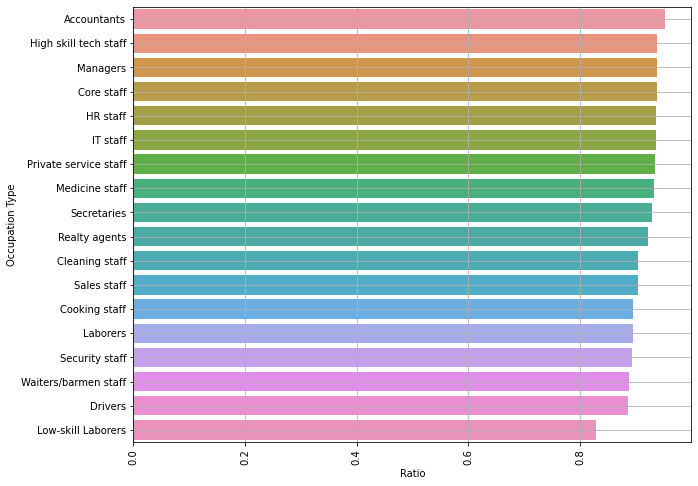

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(y='OCCUPATION_TYPE',x='occupation_ratio',data=occupation_ratio_df)
plt.xticks(rotation=90)
plt.ylabel("Occupation Type")
plt.xlabel("Ratio")
plt.grid()

#let's dive in deeper and see which gender given in a particular occupation is more prompt in repaying loans

In [ ]:
# determine number of occupation types people who meets and does not meet target
gender_df = pd.DataFrame(data=app_train_df.groupby(['CODE_GENDER','TARGET']).count()['SK_ID_CURR']).reset_index()
gender_df

,CODE_GENDER,TARGET,SK_ID_CURR
0,F,0,188278
1,F,1,14170
2,M,0,94404
3,M,1,10655
4,XNA,0,4


In [ ]:
print(f'the probability that loans can be repaid given it is a Female P(T|F) is 0.930')
print(f'the probability that loans can be repaid given it is a Male P(T|M) is 0.898')

the probability that loans can be repaid given it is a Female P(T|F) is 0.930
the probability that loans can be repaid given it is a Male P(T|M) is 0.898


In [ ]:
app_train_df.shape

(307511, 122)

##### merge Dataframes : occupation_df and gender_df

In [ ]:
app_train_df = app_train_df.append(occupation_ratio_df, ignore_index=False)
app_train_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,occupation_ratio
0,100002.0,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
1,100003.0,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,100004.0,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,100006.0,0.0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007.0,0.0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.894212
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.892576
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.887240
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886739


In [ ]:
app_train_df.shape

(307529, 123)

In [ ]:
gender_ratio_df = pd.DataFrame({"CODE_GENDER":['M','F'],"gender_ratio":[0.898,0.930]})
gender_ratio_df

,CODE_GENDER,gender_ratio
0,M,0.898
1,F,0.930


In [ ]:
app_train_df = app_train_df.append(gender_ratio_df, ignore_index=False)
app_train_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,occupation_ratio,gender_ratio
0,100002.0,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
1,100003.0,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,100004.0,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,100006.0,0.0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007.0,0.0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.887240,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886739,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.828476,NaN
0,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.898


In [ ]:
app_train_df.shape

(307531, 124)

#### let's determine the ratio of repayment dependable on both gender and occupation type by doing its product ratio respectively. We also create a new column for it on app_train_df.

In [ ]:
app_train_df['OG_RATIO'] = app_train_df['occupation_ratio']*app_train_df['gender_ratio']
app_train_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,occupation_ratio,gender_ratio,OG_RATIO
0,100002.0,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN
1,100003.0,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,100004.0,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,100006.0,0.0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007.0,0.0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.887240,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886739,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.828476,NaN,NaN
0,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.898,NaN


In [ ]:
app_train_df.shape

(307531, 125)

#### next, let's plot out the OG_RATIO verses occupation types with respective to gender on their efficiency of repayment of loans.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(x='OCCUPATION_TYPE',y='OG_RATIO',data=app_train_df, hue = 'CODE_GENDER', palette = 'Set1')
plt.xticks(rotation=90)
plt.xlabel("Occupation Type")
plt.ylabel("OG_Ratio")
plt.grid()

### how does education type affects repayment of loan on time ?

Text(0.5, 0, 'NAME_CONTRACT_TYPE')

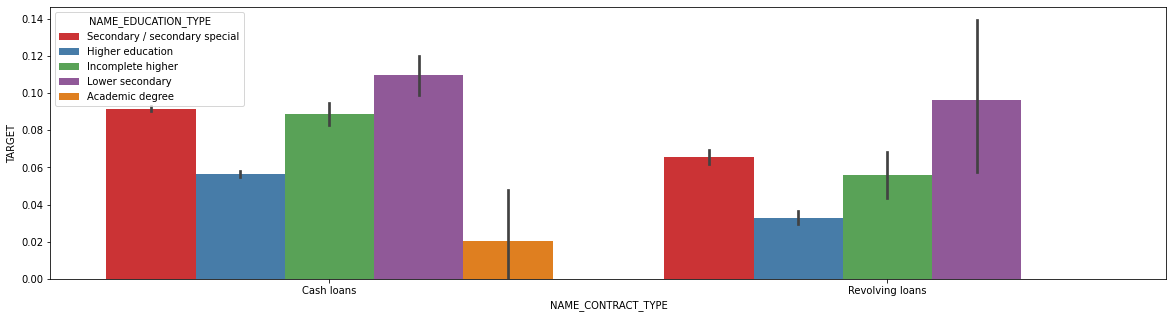

In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(20, 5))

sns.barplot(x='NAME_CONTRACT_TYPE', y='TARGET', data=app_train_df, hue = 'NAME_EDUCATION_TYPE', palette = 'Set1')
ax.set_xlabel("NAME_CONTRACT_TYPE")




In [ ]:
# determine number of EDUCATION types people who meets and does not meet target
education_df = pd.DataFrame(data=app_train_df.groupby(['NAME_EDUCATION_TYPE','TARGET']).count()['SK_ID_CURR']).reset_index()
education_df

,NAME_EDUCATION_TYPE,TARGET,SK_ID_CURR
0,Academic degree,0.0,161
1,Academic degree,1.0,3
2,Higher education,0.0,70854
3,Higher education,1.0,4009
4,Incomplete higher,0.0,9405
5,Incomplete higher,1.0,872
6,Lower secondary,0.0,3399
7,Lower secondary,1.0,417
8,Secondary / secondary special,0.0,198867
9,Secondary / secondary special,1.0,19524


In [ ]:
def education_ratio(values):
    
    flag = 1
    ratios = []
    for count in range(len(values)):
        if flag == 1:
            current_number = values[count]
            next_number = values[count+1]
            ratios.append(current_number/(current_number+next_number))
            ratios.append(current_number/(current_number+next_number))
        flag=flag*-1
    return ratios

In [ ]:
# determine values group as an array
education_value_counts = education_df['SK_ID_CURR'].values
education_value_counts

array([   161,      3,  70854,   4009,   9405,    872,   3399,    417,
       198867,  19524])

In [ ]:
# find ratio from the array
education_df['education_ratio'] = education_ratio(education_value_counts)

In [ ]:
# get the education_ratio and sort reset index and sort ratio values in descending
education_ratio_df = education_df.groupby(['NAME_EDUCATION_TYPE','education_ratio']).count().drop(['TARGET','SK_ID_CURR'], axis=1)
education_ratio_df = education_ratio_df.reset_index().sort_values(['education_ratio'],ascending=False)
education_ratio_df

,NAME_EDUCATION_TYPE,education_ratio
0,Academic degree,0.981707
1,Higher education,0.946449
2,Incomplete higher,0.915150
4,Secondary / secondary special,0.910601
3,Lower secondary,0.890723


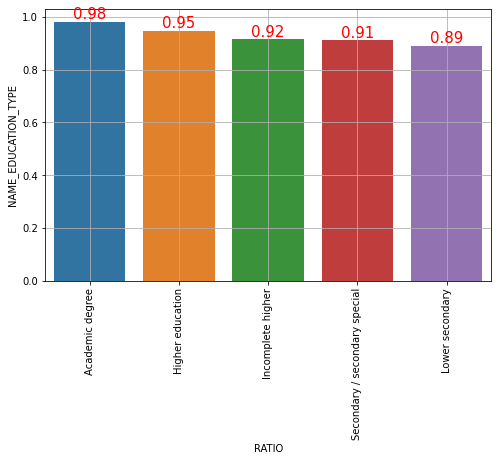

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='NAME_EDUCATION_TYPE',y='education_ratio',data=education_ratio_df)
plt.xticks(rotation=90)
plt.ylabel("NAME_EDUCATION_TYPE")
plt.xlabel("RATIO")
plt.grid()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%1.2f' % float(p.get_height()), 
            fontsize=15, color='red', ha='center', va='bottom')

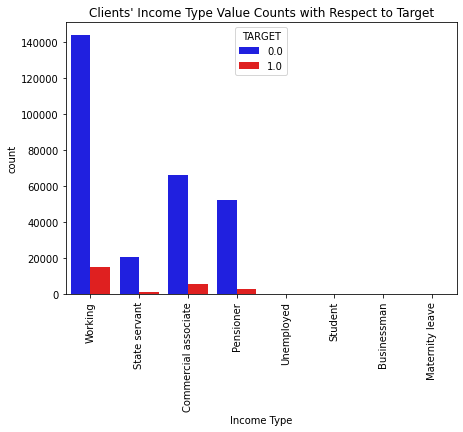

NAME_INCOME_TYPE      TARGET
Businessman           0.0           10
Commercial associate  0.0        66257
                      1.0         5360
Maternity leave       0.0            3
                      1.0            2
Pensioner             0.0        52380
                      1.0         2982
State servant         0.0        20454
                      1.0         1249
Student               0.0           18
Unemployed            0.0           14
                      1.0            8
Working               0.0       143550
                      1.0        15224
Name: TARGET, dtype: int64

In [ ]:
# what's most income type of clients?
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(data=app_train_df, x='NAME_INCOME_TYPE', hue='TARGET',palette=['blue','red']);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);
plt.title('Clients\' Income Type Value Counts with Respect to Target')
plt.xlabel('Income Type')
plt.show()

print('\n'*2)
app_train_df.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts()

In [ ]:
pd.DataFrame(app_train_df.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts())

TARGET
NAME_INCOME_TYPE     TARGET        
Businessman          0.0         10
Commercial associate 0.0      66257
                     1.0       5360
Maternity leave      0.0          3
                     1.0          2
Pensioner            0.0      52380
                     1.0       2982
State servant        0.0      20454
                     1.0       1249
Student              0.0         18
Unemployed           0.0         14
                     1.0          8
Working              0.0     143550
                     1.0      15224

Client's with low income tends to apply for loans more than others with high income.
The more client's income is, the larger loan amount apply for.
Client't with income more than 3M tends always to repay, so this feature may help in our target
Clients with income between 10 and 18 are less likely to repay, vice versa.

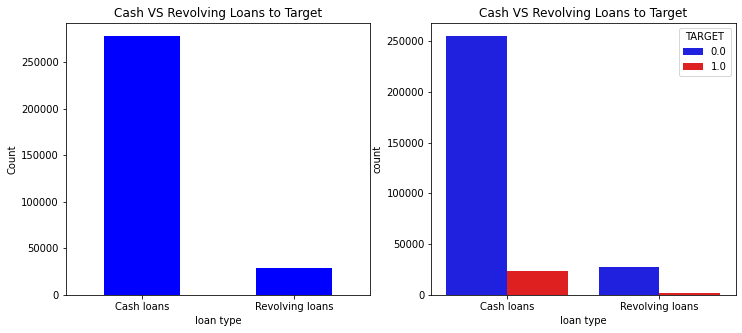

In [ ]:
# Which type of loan contract clients applys more for?

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
app_train_df['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar', title='Cash VS Revolving Loans to Target',color='blue');
plt.xlabel('loan type')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
sns.countplot(data=app_train_df, x='NAME_CONTRACT_TYPE', hue='TARGET',palette =['blue','red'])
plt.title('Cash VS Revolving Loans to Target')
plt.xlabel('loan type')
plt.show()

Text(0.5, 1.0, 'external source on test data')

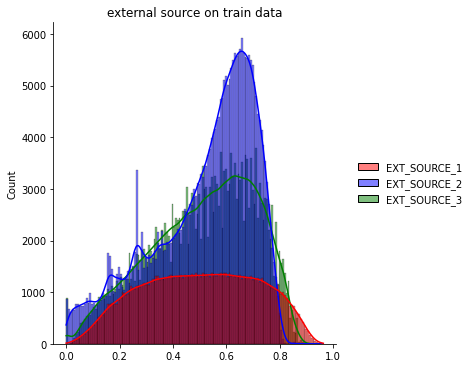

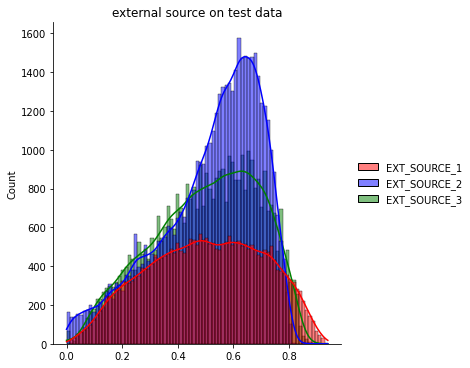

In [ ]:
tr = sns.displot(app_train_df[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]], kde=True,palette=['red','blue','green'])
plt.title("external source on train data")
ts = sns.displot(app_test_df[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]], kde=True,palette=['red','blue','green'])
plt.title("external source on test data")

In [ ]:
app_train_df["AGE"] = app_train_df["DAYS_BIRTH"]/-365
app_train_df["EXT_SOURCE_SUM"] = app_train_df["EXT_SOURCE_1"] + app_train_df["EXT_SOURCE_2"] + app_train_df["EXT_SOURCE_3"]

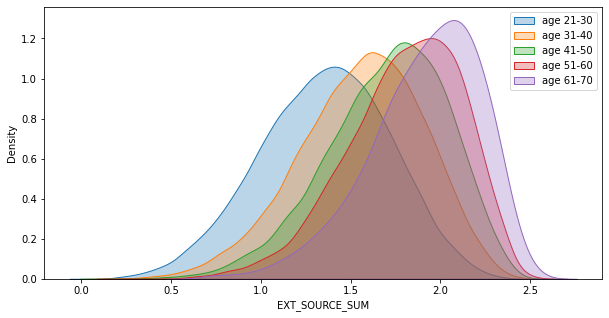

In [ ]:
plt.subplots(ncols=1, figsize=(10, 5))
#sns.kdeplot(app_train_df.loc[round(app_train_df["AGE"]/10)==2, "EXT_SOURCE_SUM"], label="below age 20")
sns.kdeplot(app_train_df.loc[round(app_train_df["AGE"]/10)==3, "EXT_SOURCE_SUM"], fill=True, label="age 21-30",alpha=.3, linewidth=1)
sns.kdeplot(app_train_df.loc[round(app_train_df["AGE"]/10)==4, "EXT_SOURCE_SUM"], fill=True, label="age 31-40",alpha=.3, linewidth=1)
sns.kdeplot(app_train_df.loc[round(app_train_df["AGE"]/10)==5, "EXT_SOURCE_SUM"], fill=True, label="age 41-50",alpha=.3, linewidth=1)
sns.kdeplot(app_train_df.loc[round(app_train_df["AGE"]/10)==6, "EXT_SOURCE_SUM"], fill=True, label="age 51-60",alpha=.3, linewidth=1)
sns.kdeplot(app_train_df.loc[round(app_train_df["AGE"]/10)==7, "EXT_SOURCE_SUM"], fill=True, label="age 61-70",alpha=.3, linewidth=1)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


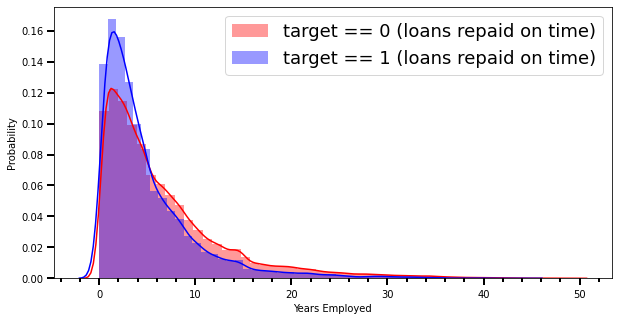

In [ ]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig, ax = plt.subplots(figsize =(10,5))
days = app_train_df.loc[:,['DAYS_EMPLOYED', 'TARGET']]

target1 = days[days['TARGET'] ==1]['DAYS_EMPLOYED']
target1_norm = target1[target1 != 365243]/-365

target0 = days[days['TARGET'] ==0]['DAYS_EMPLOYED']
target0_norm = target0[target0 != 365243] /-365

sns.distplot(target0_norm.values, label = 'target == 0 (loans repaid on time)', color = 'r')
sns.distplot(target1_norm.values, label = 'target == 1 (loans repaid on time)', color = 'b')

ax.legend(loc ='upper right', fontsize =18)
ax.set_xlabel('Years Employed')
ax.set_ylabel('Probability')

ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='black')

In [ ]:
# determine continuous columns
all_numerical_cols = list(app_train_df.select_dtypes(exclude='object').columns)

# continuous  columns are all columns excluding target and flags columns
cont_cols = [col for col in all_numerical_cols if col!="TARGET" and col[:5]!='FLAG_']
print(f'No. of continuous features = {len(cont_cols)}')

No. of continuous features = 84


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


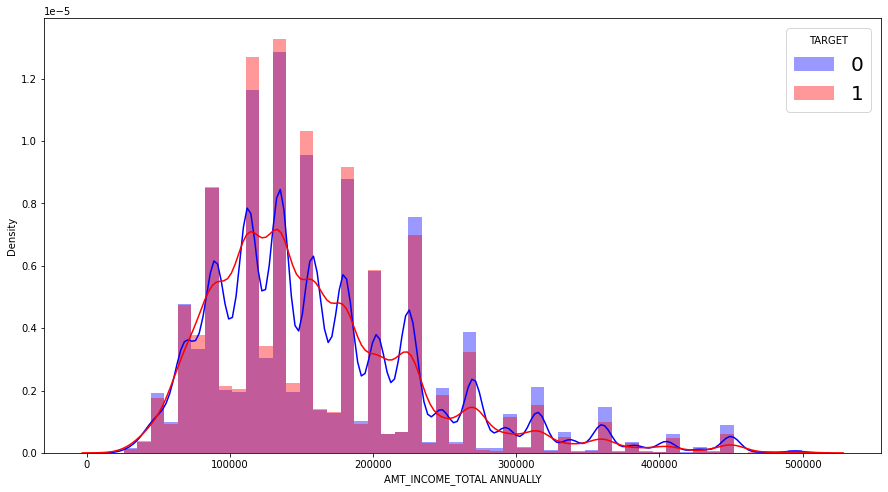

In [ ]:
plt.subplots(ncols=1, figsize=(15, 8))
cond1 = (app_train_df['TARGET'] == 1)
cond0 = (app_train_df['TARGET'] == 0)
#we make a rule of thumb of annual income is less than 500k per year, earning less than 41k a month
cond_amt = (app_train_df['AMT_INCOME_TOTAL'] < 500000)



sns.distplot(app_train_df[cond0 & cond_amt]['AMT_INCOME_TOTAL'], label='0', color='blue') 
sns.distplot(app_train_df[cond1 & cond_amt]['AMT_INCOME_TOTAL'], label='1', color='red')
plt.xlabel('AMT_INCOME_TOTAL ANNUALLY')
plt.legend(title = 'TARGET' ,fontsize = '20')

In [ ]:
#To check the dataframe header and first 5 rows of data
bu_df.shape

(1716428, 17)

In [ ]:
bu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [ ]:
bu_df.isnull().sum().sort_values()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_UPDATE              0
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
AMT_CREDIT_SUM                 13
DAYS_CREDIT_ENDDATE        105553
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
AMT_ANNUITY               1226791
dtype: int64

In [ ]:
pd.DataFrame(data=bu_df.groupby(['CREDIT_DAY_OVERDUE']).count()['SK_ID_CURR']).reset_index()

,CREDIT_DAY_OVERDUE,SK_ID_CURR
0,0,1712211
1,1,5
2,2,18
3,3,29
4,4,46
...,...,...
937,2766,1
938,2770,1
939,2776,1
940,2781,1


In [ ]:
# CREDIT_DAY_OVERDUE keep 0 and anything above -1
bu_df_Clean = bu_df[["SK_ID_CURR","CREDIT_DAY_OVERDUE"]]
bu_df_Clean = bu_df_Clean[bu_df.CREDIT_DAY_OVERDUE>=1]
bu_df_Clean = bu_df_Clean.groupby(by="SK_ID_CURR")["CREDIT_DAY_OVERDUE"].sum()

In [ ]:
bu_df_Clean

SK_ID_CURR
100120      55
100162    1272
100341     161
100349      25
100472      64
          ... 
455858    1205
455865      10
455988      46
456112      31
456230      12
Name: CREDIT_DAY_OVERDUE, Length: 3864, dtype: int64

In [ ]:
app_train_df = pd.DataFrame(app_train_pd)

In [ ]:
app_train_df.shape

(307511, 122)

In [ ]:
#merge df app_train_df with bu_df_Clean
app_train_df=app_train_df.merge(bu_df_Clean,how='left',on='SK_ID_CURR')

In [ ]:
app_train_df.loc[app_train_df["CREDIT_DAY_OVERDUE"] > 1, "CREDIT_DAY_OVERDUE"] = 1
app_train_df.loc[app_train_df["CREDIT_DAY_OVERDUE"].isnull(), "CREDIT_DAY_OVERDUE"] = 0

In [ ]:
app_train_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_DAY_OVERDUE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
app_train_df.groupby(['CREDIT_DAY_OVERDUE']).count()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CREDIT_DAY_OVERDUE,,,,,,,,,,,,,,,,,,,,,
0.0,304114,304114,304114,304114,304114,304114,304114,304114,304114,304103,...,304114,304114,304114,304114,262595,262595,262595,262595,262595,262595
1.0,3397,3397,3397,3397,3397,3397,3397,3397,3397,3396,...,3397,3397,3397,3397,3397,3397,3397,3397,3397,3397


In [ ]:
#merge df app_test_df with bu_df_Clean
app_test_df=app_test_df.merge(bu_df_Clean,how='left',on='SK_ID_CURR')

In [ ]:
app_test_df.loc[app_test_df["CREDIT_DAY_OVERDUE"] > 1, "CREDIT_DAY_OVERDUE"] = 1
app_test_df.loc[app_test_df["CREDIT_DAY_OVERDUE"].isnull(), "CREDIT_DAY_OVERDUE"] = 0

In [ ]:
app_test_df

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_DAY_OVERDUE
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,0.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0,0.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [ ]:
app_test_df.groupby(['CREDIT_DAY_OVERDUE']).count()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CREDIT_DAY_OVERDUE,,,,,,,,,,,,,,,,,,,,,
0.0,48277,48277,48277,48277,48277,48277,48277,48277,48253,48277,...,48277,48277,48277,48277,42228,42228,42228,42228,42228,42228
1.0,467,467,467,467,467,467,467,467,467,467,...,467,467,467,467,467,467,467,467,467,467


In [ ]:
#To check the dataframe header and first 10 rows of data
app_test_df.head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_DAY_OVERDUE
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,0.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [ ]:
# find out the number of rows and columns for dataframe
print('Training data shape: ',app_train_df.shape)
print('Testing data shape: ',app_test_df.shape)

Training data shape:  (307511, 123)
Testing data shape:  (48744, 122)


In [ ]:
# find out the more information about the dataframe
#app_train_df.dtypes
app_train_df.select_dtypes(include='object').describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In [ ]:
print(app_train_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 123 entries, SK_ID_CURR to CREDIT_DAY_OVERDUE
dtypes: float64(66), int64(41), object(16)
memory usage: 290.9+ MB
None


In [ ]:
print(app_test_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 0 to 48743
Columns: 122 entries, SK_ID_CURR to CREDIT_DAY_OVERDUE
dtypes: float64(66), int64(40), object(16)
memory usage: 45.7+ MB
None


In [ ]:
# find out the number of missing value
(app_train_df.isnull().sum()).sort_values()

SK_ID_CURR                          0
HOUR_APPR_PROCESS_START             0
REG_REGION_NOT_LIVE_REGION          0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
                                ...  
NONLIVINGAPARTMENTS_MODE       213514
NONLIVINGAPARTMENTS_MEDI       213514
COMMONAREA_AVG                 214865
COMMONAREA_MEDI                214865
COMMONAREA_MODE                214865
Length: 123, dtype: int64

In [ ]:
# find out the number of missing value
(app_test_df.isnull().sum()).sort_values()

SK_ID_CURR                         0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
                               ...  
NONLIVINGAPARTMENTS_AVG        33347
NONLIVINGAPARTMENTS_MEDI       33347
COMMONAREA_MODE                33495
COMMONAREA_MEDI                33495
COMMONAREA_AVG                 33495
Length: 122, dtype: int64

In [ ]:
# Number of each type of column
print('Train Columns\n',app_train_df.dtypes.value_counts())
print('\nTest Columns\n',app_test_df.dtypes.value_counts())

Train Columns
 float64    66
int64      41
object     16
dtype: int64

Test Columns
 float64    66
int64      40
object     16
dtype: int64


In [ ]:
# Number of unique classes in each object column
print('Train Data Set\n',app_train_df.select_dtypes('object').apply(pd.Series.nunique, axis= 0))
print('\nTest Data Set\n',app_test_df.select_dtypes('object').apply(pd.Series.nunique, axis= 0))

Train Data Set
 NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Test Data Set
 NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             

In [ ]:
app_train_df.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "YlOrRd").bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")

,count,mean,std,min,25%,50%,75%,max
AMT_CREDIT,307511.000000,599025.999706,402490.776996,45000.000000,270000.000000,513531.000000,808650.000000,4050000.000000
AMT_GOODS_PRICE,307233.000000,538396.207429,369446.460540,40500.000000,238500.000000,450000.000000,679500.000000,4050000.000000
SK_ID_CURR,307511.000000,278180.518577,102790.175348,100002.000000,189145.500000,278202.000000,367142.500000,456255.000000
AMT_INCOME_TOTAL,307511.000000,168797.919297,237123.146279,25650.000000,112500.000000,147150.000000,202500.000000,117000000.000000
DAYS_EMPLOYED,307511.000000,63815.045904,141275.766519,-17912.000000,-2760.000000,-1213.000000,-289.000000,365243.000000
AMT_ANNUITY,307499.000000,27108.573909,14493.737315,1615.500000,16524.000000,24903.000000,34596.000000,258025.500000
HOUR_APPR_PROCESS_START,307511.000000,12.063419,3.265832,0.000000,10.000000,12.000000,14.000000,23.000000
OWN_CAR_AGE,104582.000000,12.061091,11.944812,0.000000,5.000000,9.000000,15.000000,91.000000
CNT_FAM_MEMBERS,307509.000000,2.152665,0.910682,1.000000,2.000000,2.000000,3.000000,20.000000
REGION_RATING_CLIENT,307511.000000,2.052463,0.509034,1.000000,2.000000,2.000000,2.000000,3.000000


In [ ]:
app_test_df.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn").bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")

,count,mean,std,min,25%,50%,75%,max
AMT_CREDIT,48744.000000,516740.435561,365397.004174,45000.000000,260640.000000,450000.000000,675000.000000,2245500.000000
AMT_GOODS_PRICE,48744.000000,462618.840473,336710.215040,45000.000000,225000.000000,396000.000000,630000.000000,2245500.000000
SK_ID_CURR,48744.000000,277796.676350,103169.547296,100001.000000,188557.750000,277549.000000,367555.500000,456250.000000
AMT_INCOME_TOTAL,48744.000000,178431.805855,101522.591536,26941.500000,112500.000000,157500.000000,225000.000000,4410000.000000
DAYS_EMPLOYED,48744.000000,67485.366322,144348.507136,-17463.000000,-2910.000000,-1293.000000,-296.000000,365243.000000
AMT_ANNUITY,48720.000000,29426.240209,16016.368315,2295.000000,17973.000000,26199.000000,37390.500000,180576.000000
HOUR_APPR_PROCESS_START,48744.000000,12.007365,3.278172,0.000000,10.000000,12.000000,14.000000,23.000000
OWN_CAR_AGE,16432.000000,11.786027,11.462889,0.000000,4.000000,9.000000,15.000000,74.000000
CNT_FAM_MEMBERS,48744.000000,2.146767,0.890423,1.000000,2.000000,2.000000,3.000000,21.000000
REGION_RATING_CLIENT,48744.000000,2.038159,0.522694,1.000000,2.000000,2.000000,2.000000,3.000000


In [ ]:
app_train_df.describe(include='object').T.sort_values(ascending = 0,by = "top").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["freq"], color ="crimson").bar(subset = ["unique"], color ="green").bar(subset = ["count"], color ="blue")

,count,unique,top,freq
FONDKAPREMONT_MODE,97216,4,reg oper account,73830
HOUSETYPE_MODE,153214,3,block of flats,150503
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
WEEKDAY_APPR_PROCESS_START,307511,7,TUESDAY,53901
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
WALLSMATERIAL_MODE,151170,7,Panel,66040
EMERGENCYSTATE_MODE,161756,2,No,159428
FLAG_OWN_CAR,307511,2,N,202924


In [ ]:
def missing_data(app_train_df):
    total = app_train_df.isnull().sum().sort_values(ascending = False)
    percent = (app_train_df.isnull().sum()/app_train_df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [ ]:
missing_data(app_train_df).head(70)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_MODE,214865,69.872297
COMMONAREA_AVG,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
...,...,...
CNT_FAM_MEMBERS,2,0.000650
DAYS_LAST_PHONE_CHANGE,1,0.000325
FLAG_DOCUMENT_12,0,0.000000
FLAG_DOCUMENT_13,0,0.000000


# changing NA in objects to mode (most occurence object)

for tr_ob in app_train_df.describe(include ='object').columns:
    df_mode = app_train_df[tr_ob].mode()[0]
    app_train_df[tr_ob]=app_train_df[tr_ob].fillna(df_mode)

In [ ]:
# Check for missing value in Train
app_train_df.isnull().sum().sort_values()

SK_ID_CURR                          0
HOUR_APPR_PROCESS_START             0
REG_REGION_NOT_LIVE_REGION          0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
                                ...  
NONLIVINGAPARTMENTS_MODE       213514
NONLIVINGAPARTMENTS_MEDI       213514
COMMONAREA_AVG                 214865
COMMONAREA_MEDI                214865
COMMONAREA_MODE                214865
Length: 123, dtype: int64

In [ ]:
for tr_ob in app_train_df.describe(include ='object').columns:
    df_mode = app_train_df[tr_ob].mode()[0]
    app_train_df[tr_ob]=app_train_df[tr_ob].fillna(df_mode)

In [ ]:
app_train_df.isnull().sum().sort_values()

SK_ID_CURR                          0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
REG_CITY_NOT_WORK_CITY              0
                                ...  
NONLIVINGAPARTMENTS_MODE       213514
NONLIVINGAPARTMENTS_MEDI       213514
COMMONAREA_AVG                 214865
COMMONAREA_MEDI                214865
COMMONAREA_MODE                214865
Length: 123, dtype: int64

In [ ]:
# changing NA in objects to mode (most occurence object)
for tr_ci in app_train_df.describe().columns:
    app_train_df[tr_ci]=app_train_df[tr_ci].fillna((app_train_df[tr_ci].median()))

In [ ]:
# Check for missing value in Train
(app_train_df.isnull().sum()).sort_values()

SK_ID_CURR                    0
WALLSMATERIAL_MODE            0
TOTALAREA_MODE                0
HOUSETYPE_MODE                0
FONDKAPREMONT_MODE            0
                             ..
REG_REGION_NOT_LIVE_REGION    0
HOUR_APPR_PROCESS_START       0
WEEKDAY_APPR_PROCESS_START    0
REGION_RATING_CLIENT          0
CREDIT_DAY_OVERDUE            0
Length: 123, dtype: int64

In [ ]:
# changing NA in objects to mode (most occurence object)
for te_ci in app_test_df.describe().columns:
    app_test_df[te_ci]=app_test_df[te_ci].fillna((app_test_df[te_ci].median()))

In [ ]:
# Check for missing value in Test
(app_test_df.isnull().sum()).sort_values()

SK_ID_CURR                      0
TOTALAREA_MODE                  0
NONLIVINGAREA_MEDI              0
NONLIVINGAPARTMENTS_MEDI        0
LIVINGAREA_MEDI                 0
                            ...  
OCCUPATION_TYPE             15605
EMERGENCYSTATE_MODE         22209
HOUSETYPE_MODE              23619
WALLSMATERIAL_MODE          23893
FONDKAPREMONT_MODE          32797
Length: 122, dtype: int64

In [ ]:
# Check for missing value in Test
(app_test_df.isnull().sum()).sort_values()

SK_ID_CURR                      0
TOTALAREA_MODE                  0
NONLIVINGAREA_MEDI              0
NONLIVINGAPARTMENTS_MEDI        0
LIVINGAREA_MEDI                 0
                            ...  
OCCUPATION_TYPE             15605
EMERGENCYSTATE_MODE         22209
HOUSETYPE_MODE              23619
WALLSMATERIAL_MODE          23893
FONDKAPREMONT_MODE          32797
Length: 122, dtype: int64

In [ ]:
# Change XNA to mode
app_train_df['CODE_GENDER'] = app_train_df['CODE_GENDER'].replace(['XNA'],['F'])

# **Dataset Transformation**

In [ ]:
app_train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_DAY_OVERDUE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Check number of unique classes in object types in each category
app_train_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [ ]:
df_object = app_train_df[["TARGET","NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE","WEEKDAY_APPR_PROCESS_START","ORGANIZATION_TYPE","FONDKAPREMONT_MODE","HOUSETYPE_MODE","WALLSMATERIAL_MODE","EMERGENCYSTATE_MODE"]]

In [ ]:
df_object.corr()['TARGET'].sort_values()

TARGET    1.0
Name: TARGET, dtype: float64

# **Data Transformation (Train Dataset)**

## **1. Transform Ordinal Data Type**

In [ ]:
app_train_df['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [ ]:
#Map the atribute into ordinal numbers from 0-4
scale_mapper = {'Lower secondary' : 0, 'Secondary / secondary special' : 1, 
'Incomplete higher' : 2, 'Higher education' : 3, 'Academic degree' : 4}

app_train_df['NAME_EDUCATION_TYPE'] = app_train_df['NAME_EDUCATION_TYPE'].replace(scale_mapper)

In [ ]:
app_train_df['NAME_EDUCATION_TYPE'].unique()

array([1, 3, 2, 0, 4])

# #**2. Transform Categorial Type**

### **2.1 Transform Categorial type which does not have hierarchy using LabelEncoder**

In [ ]:
#Check number of unique classes in object types in each category
app_train_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [ ]:
#Conversion of Categorial Dataset to Numerical Dataset (Convert anything with >=2 unique Values)
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train_df:
    if app_train_df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train_df[col].unique())) <= 58:
            # Train on the training data
            le.fit(app_train_df[col])
            # Transform both training and testing data
            app_train_df[col] = le.transform(app_train_df[col])
            #app_test_df[col] = le.transform(app_test_df[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)


15 columns were label encoded.


In [ ]:
#Conversion of Categorial Dataset to Numerical Dataset (Convert anything with >=2 unique Values)
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_test_df:
    if app_test_df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_test_df[col].unique())) <= 58:
            # Train on the training data
            le.fit(app_test_df[col])
            # Transform both training and testing data
            app_test_df[col] = le.transform(app_test_df[col])
            #app_test_df[col] = le.transform(app_test_df[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

16 columns were label encoded.


In [ ]:
#Check number of unique classes in object types in each category
app_train_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

In [ ]:
app_train_df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              int64
CODE_GENDER                     int64
FLAG_OWN_CAR                    int64
                               ...   
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
CREDIT_DAY_OVERDUE            float64
Length: 123, dtype: object

In [ ]:
df_object = app_train_df[["TARGET","NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE","WEEKDAY_APPR_PROCESS_START","ORGANIZATION_TYPE","FONDKAPREMONT_MODE","HOUSETYPE_MODE","WALLSMATERIAL_MODE","EMERGENCYSTATE_MODE"]]

In [ ]:
df_object.corr()['TARGET'].sort_values()

NAME_EDUCATION_TYPE          -0.056872
NAME_CONTRACT_TYPE           -0.030896
ORGANIZATION_TYPE            -0.030765
FLAG_OWN_CAR                 -0.021851
FLAG_OWN_REALTY              -0.006148
NAME_FAMILY_STATUS           -0.004127
FONDKAPREMONT_MODE            0.000119
HOUSETYPE_MODE                0.003445
WALLSMATERIAL_MODE            0.003654
WEEKDAY_APPR_PROCESS_START    0.004002
EMERGENCYSTATE_MODE           0.004829
NAME_TYPE_SUITE               0.008319
OCCUPATION_TYPE               0.017357
NAME_HOUSING_TYPE             0.034489
NAME_INCOME_TYPE              0.046829
CODE_GENDER                   0.054713
TARGET                        1.000000
Name: TARGET, dtype: float64

### **2.2 Transform Categorial type > 2 Unique Values (KIV)**

In [ ]:
#OnehotEncoder
#NAME_TYPE_SUITE_dummies = pd.get_dummies(app_train_df['NAME_TYPE_SUITE'],prefix='NAME_TYPE_SUITE')
#Concate the dummies into train dataset
#app_train_selected = pd.concat([app_train_df, NAME_TYPE_SUITE_dummies], axis=1)
#Drop categorical attribute (before transformation)
#app_train_selected = app_train_selected.drop(['NAME_TYPE_SUITE'], axis=1)

# **Data Transformation (Test Dataset)**

In [ ]:
#Check number of unique classes in object types in each category
app_test_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

## **1. Transform Ordinal Data Type**

In [ ]:
app_test_df['NAME_EDUCATION_TYPE'].unique()

array([1, 4, 2, 3, 0])

In [ ]:
#Map the atribute into ordinal numbers from 0-4
scale_mapper = {'Lower secondary' : 0, 'Secondary / secondary special' : 1, 
'Incomplete higher' : 2, 'Higher education' : 3, 'Academic degree' : 4}

app_test_df['NAME_EDUCATION_TYPE'] = app_test_df['NAME_EDUCATION_TYPE'].replace(scale_mapper)

In [ ]:
app_test_df['NAME_EDUCATION_TYPE'].unique()

array([1, 4, 2, 3, 0])

In [ ]:
#Check number of unique classes in object types in each category
app_test_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

In [ ]:
app_test_df.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE              int64
CODE_GENDER                     int64
FLAG_OWN_CAR                    int64
FLAG_OWN_REALTY                 int64
                               ...   
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
CREDIT_DAY_OVERDUE            float64
Length: 122, dtype: object

In [ ]:
for header in app_train_df.columns:
    print(header.capitalize())
    print('Number of Unique values:',app_train_df[header].nunique())
    print("Value Count of ",header.capitalize())
    print(app_train_df[header].value_counts().sort_values())
    print("")
    print("**********************************************************************************")
    print("")

Sk_id_curr
Number of Unique values: 307511
Value Count of  Sk_id_curr
100002    1
100008    1
100009    1
100010    1
100011    1
         ..
456176    1
456237    1
456235    1
456217    1
456255    1
Name: SK_ID_CURR, Length: 307511, dtype: int64

**********************************************************************************

Target
Number of Unique values: 2
Value Count of  Target
1     24825
0    282686
Name: TARGET, dtype: int64

**********************************************************************************

Name_contract_type
Number of Unique values: 2
Value Count of  Name_contract_type
1     29279
0    278232
Name: NAME_CONTRACT_TYPE, dtype: int64

**********************************************************************************

Code_gender
Number of Unique values: 2
Value Count of  Code_gender
1    105059
0    202452
Name: CODE_GENDER, dtype: int64

**********************************************************************************

Flag_own_car
Number of Unique values

In [ ]:
# Find correlation with the target and sort
correlations = app_train_df.corr()['TARGET'].sort_values()

# Display correlations
print('Most Postive Correlations:\n',correlations.tail(15))
print('\nMost Negative Correlations:\n',correlations.head(15))

Most Postive Correlations:
 LIVE_CITY_NOT_WORK_CITY        0.032518
NAME_HOUSING_TYPE              0.034489
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
NAME_INCOME_TYPE               0.046829
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
CODE_GENDER                    0.054713
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_2                 -0.160295
EXT_SOURCE_3                 -0.155892
EXT_SOURCE_1                 -0.098887
NAME_EDUCATION_TYPE          -0.056872
DAYS_EMPLOYED                -0.044932
AMT_GOODS_PRICE              -0.039623
FLOORSMAX_AVG                -0.039385
FLOORSMAX_MEDI               -0.039157
F

# **Dataset Transformation**

In [ ]:
app_train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_DAY_OVERDUE
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Check number of unique classes in object types in each category
app_train_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

In [ ]:
df_object = app_train_df[["TARGET","NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE","WEEKDAY_APPR_PROCESS_START","ORGANIZATION_TYPE","FONDKAPREMONT_MODE","HOUSETYPE_MODE","WALLSMATERIAL_MODE","EMERGENCYSTATE_MODE"]]

In [ ]:
df_object.corr()['TARGET'].sort_values()

NAME_EDUCATION_TYPE          -0.056872
NAME_CONTRACT_TYPE           -0.030896
ORGANIZATION_TYPE            -0.030765
FLAG_OWN_CAR                 -0.021851
FLAG_OWN_REALTY              -0.006148
NAME_FAMILY_STATUS           -0.004127
FONDKAPREMONT_MODE            0.000119
HOUSETYPE_MODE                0.003445
WALLSMATERIAL_MODE            0.003654
WEEKDAY_APPR_PROCESS_START    0.004002
EMERGENCYSTATE_MODE           0.004829
NAME_TYPE_SUITE               0.008319
OCCUPATION_TYPE               0.017357
NAME_HOUSING_TYPE             0.034489
NAME_INCOME_TYPE              0.046829
CODE_GENDER                   0.054713
TARGET                        1.000000
Name: TARGET, dtype: float64

# To select only variables to reduce processing time

In [ ]:
selected_train_df = app_train_df[{'TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_EMPLOYED','CREDIT_DAY_OVERDUE','CODE_GENDER','OCCUPATION_TYPE','NAME_EDUCATION_TYPE','NAME_CONTRACT_TYPE','FLAG_OWN_CAR','NAME_HOUSING_TYPE','NAME_INCOME_TYPE'}]

In [ ]:
selected_test_df = app_test_df[{'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_EMPLOYED','CREDIT_DAY_OVERDUE','CODE_GENDER','OCCUPATION_TYPE','NAME_EDUCATION_TYPE','NAME_CONTRACT_TYPE','FLAG_OWN_CAR','NAME_HOUSING_TYPE','NAME_INCOME_TYPE'}]

In [ ]:
selected_train_df.shape

(307511, 14)

In [ ]:
selected_test_df.shape

(48744, 13)

In [ ]:
(selected_train_df['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [ ]:
selected_train_df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
anom = selected_train_df[selected_train_df['DAYS_EMPLOYED'] == 365243]
non_anom = selected_train_df[selected_train_df['DAYS_EMPLOYED'] != 365243]
print('The non_anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non_anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


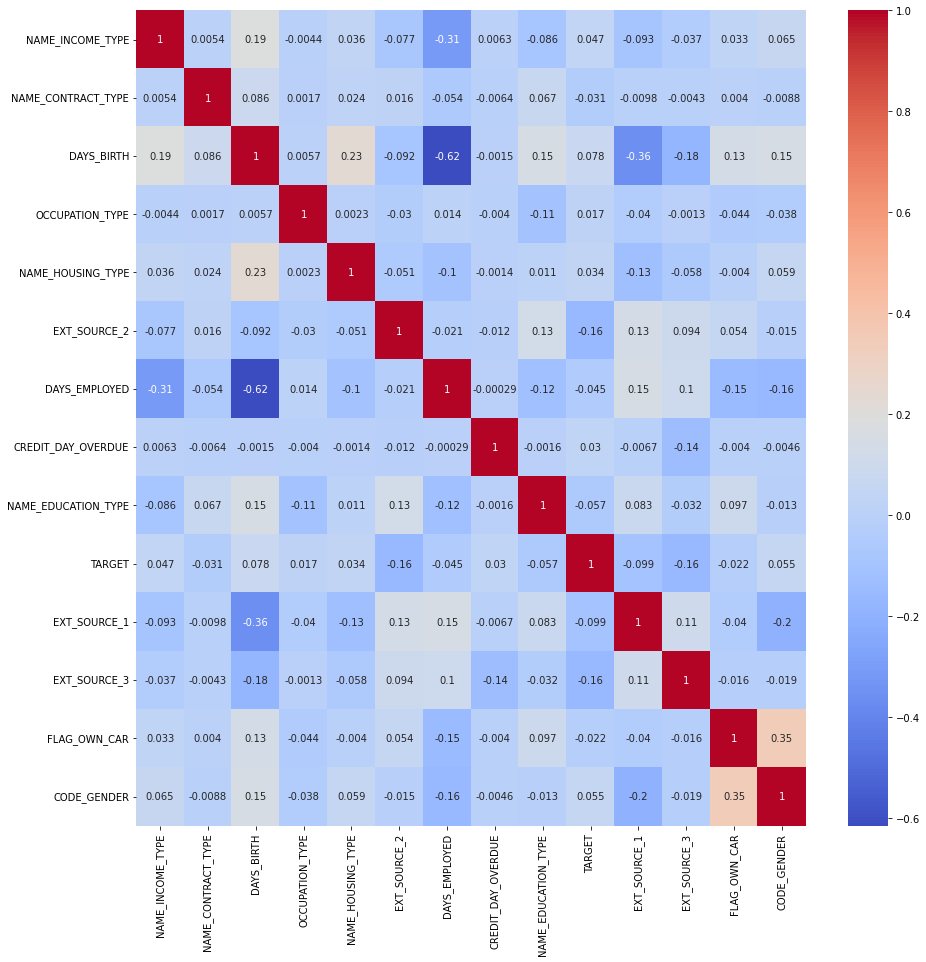

In [ ]:
# To view the dataframe correlation in heatmap format
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(selected_train_df.corr(),annot=True,cmap='coolwarm')

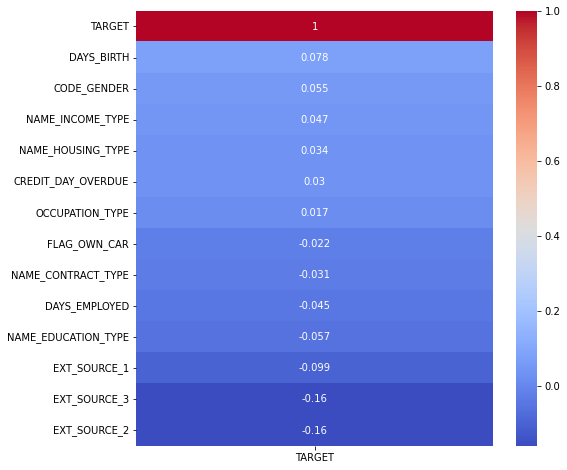

In [ ]:
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(selected_train_df.corr()[['TARGET']].sort_values(by=['TARGET'],ascending=False),annot=True,cmap='coolwarm')

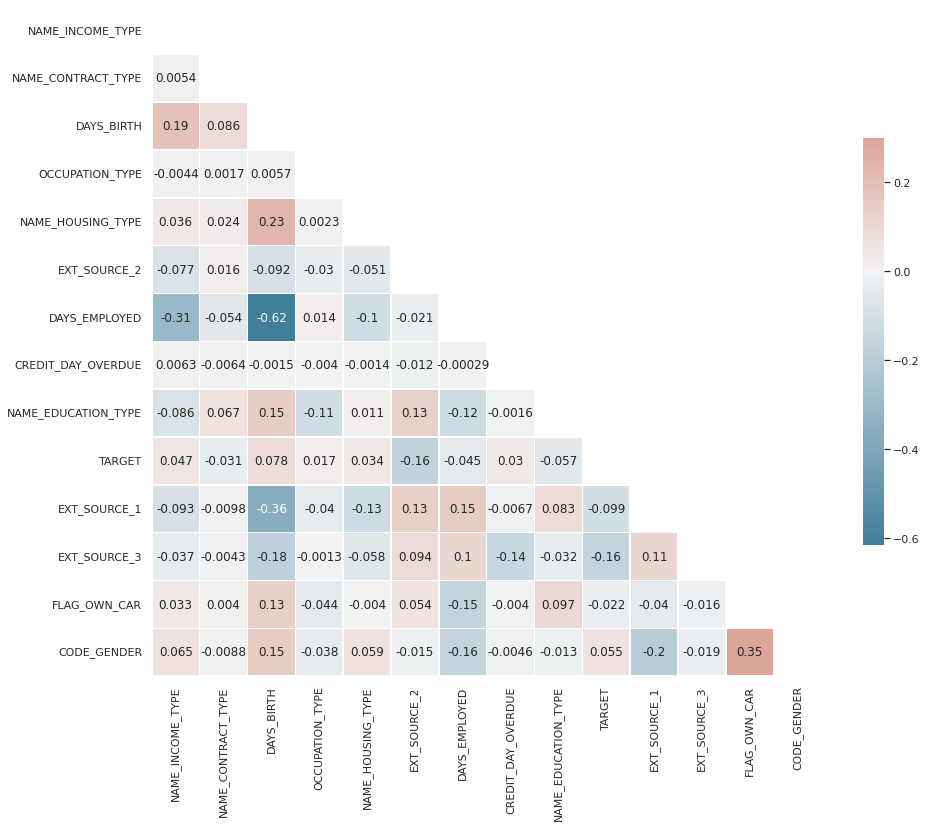

In [ ]:
# selected_train_df dataframe correlation 

sns.set_theme(style="white")


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(selected_train_df.corr(), dtype = bool))  

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(selected_train_df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot= True)

In [ ]:
# Find the correlation of the positive days since birth and target
selected_train_df['DAYS_BIRTH'] = abs(selected_train_df['DAYS_BIRTH'])
selected_train_df['DAYS_BIRTH'].corr(selected_train_df['TARGET'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


-0.07823930830982694

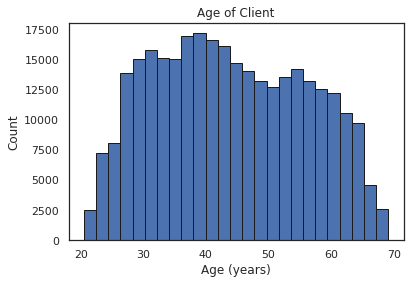

In [ ]:
# Plot the distribution of ages in years

plt.hist(selected_train_df['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count');

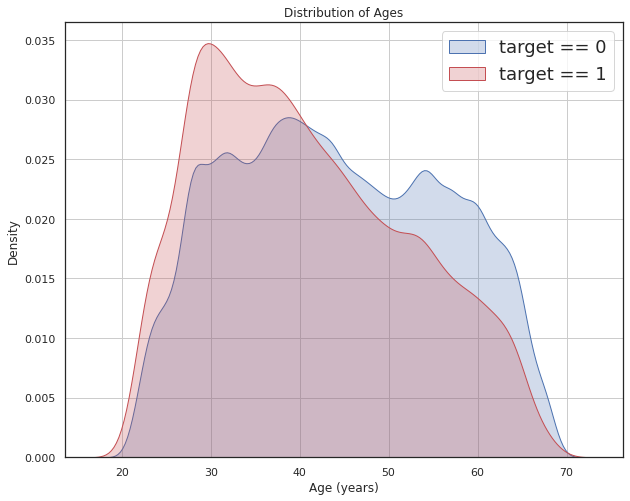

In [ ]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(selected_train_df.loc[selected_train_df['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0', fill=True, color ='b')

# KDE plot of loans which were not repid on time
sns.kdeplot(selected_train_df.loc[selected_train_df['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1',fill=True, color ='r')

# Labeling of plot
plt.legend(loc = 'upper right', fontsize = 18)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')
#plt.xticks(selected_train_df['DAYS_BIRTH'])
plt.grid();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and pass

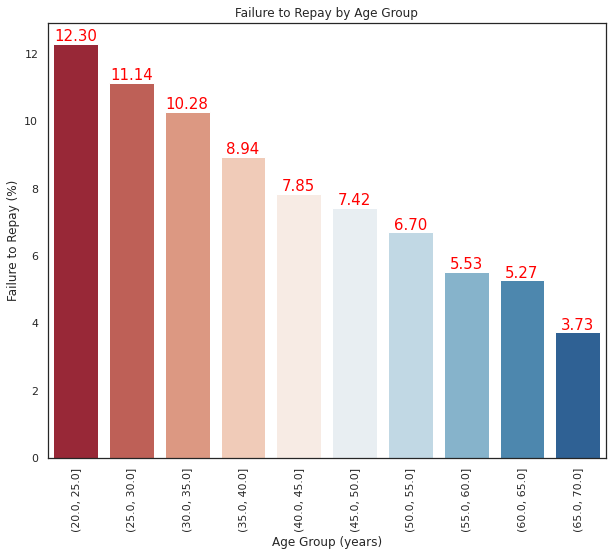

In [ ]:
# Age information in to a seperate dataframe
age_data = selected_train_df[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

# Group by the bin and calculate averages
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

plt.figure(figsize= (10, 8))

# Graph the age bins and the average of the target as a bar plot
#plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])
diverging_colors = sns.color_palette("RdBu", 10)
ax = sns.barplot(age_groups.index.astype(str), 100 * age_groups['TARGET'], palette=diverging_colors,dodge=True, edgecolor = 'w')
# Plot labeling
plt.xticks(rotation = 90)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

#display percent
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%1.2f' % float(p.get_height()), 
            fontsize=15, color='red', ha='center', va='bottom')

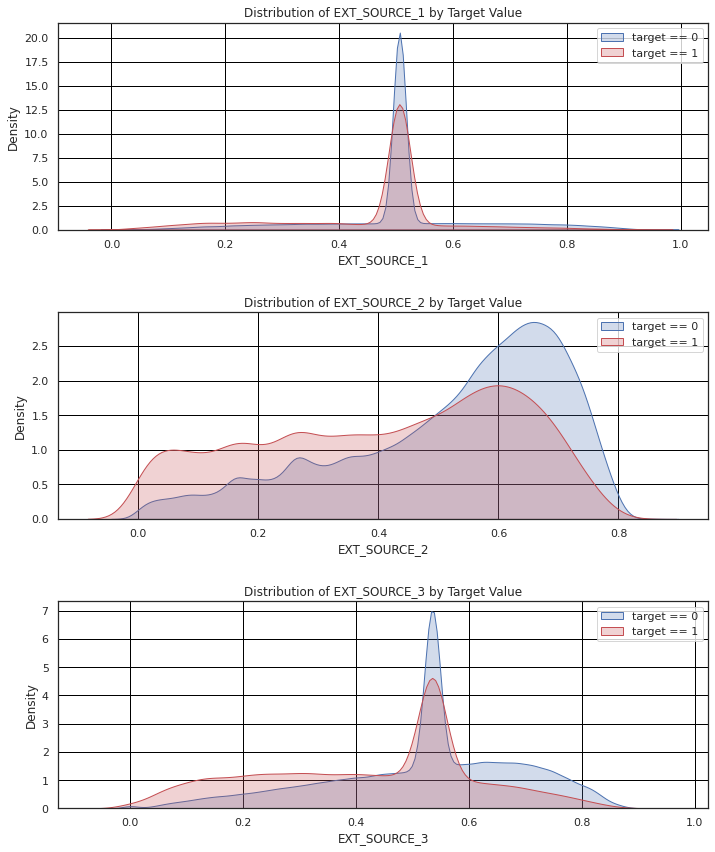

In [ ]:
plt.figure(figsize = (10, 12))

# iterate through the sources

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # Create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # Plot repaid loans
    sns.kdeplot(selected_train_df.loc[selected_train_df['TARGET'] == 0, source], label = 'target == 0',color='b', fill='True')
    # Plot loans that were not repaid

    
    sns.kdeplot(selected_train_df.loc[selected_train_df['TARGET'] == 1, source], label = 'target == 1',color ='r',fill='True')
    
    # Label the plot
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    plt.legend()
    plt.grid(c = 'black');
    
plt.tight_layout(h_pad = 2.5)

### Supervising model 
1. Logistic Regression:  on trained dataset 
X = Everything except 'TARGET','SK_ID_CURR'
y = 'TARGET'
2. KNN: and we would need to smote to make trained dataset balanced.


#### Logistic Regression


In [ ]:
# x & y
X = selected_train_df.drop(['TARGET'],axis=1)
y = selected_train_df['TARGET']

#_test Data
X_test = selected_test_df

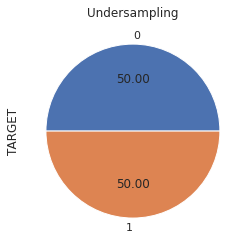

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1)
X_rus,y_rus = rus.fit_resample(X,y)

ax = y_rus.value_counts().plot.pie(autopct='%.2f')

_ = ax.set_title("Undersampling")

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_rus,y_rus,test_size = 0.33,random_state=42)

In [ ]:
X_train.shape

(33265, 13)

In [ ]:
train_logistic = LogisticRegression(max_iter=3000,class_weight='balanced')

In [ ]:
train_logistic.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=3000)

In [ ]:
print(f' the Trained logistic score model is {train_logistic.score(X_train, y_train)}')

 the Trained logistic score model is 0.5325116488802044


In [ ]:
print(train_logistic.intercept_)
print(train_logistic.coef_)

[4.46577057e-10]
[[ 4.34287347e-09 -1.98399250e-10  4.08524695e-07  5.18309649e-09
   1.44514184e-09 -6.13483135e-10 -1.18747986e-06  8.94189887e-11
  -8.29687941e-10 -1.27579413e-10 -5.03924470e-10 -1.31274348e-10
   8.00819539e-10]]


In [ ]:
train_logistic.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
X_test.shape #33% of data tested

(16385, 13)

In [ ]:
Z_proba = np.round(train_logistic.predict_proba(X_test),2)

In [ ]:
print(f' the Test logistic score model is {train_logistic.score(X_test, y_test)} ')

 the Test logistic score model is 0.5286542569423253 


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_rus.head()

,NAME_INCOME_TYPE,NAME_CONTRACT_TYPE,DAYS_BIRTH,OCCUPATION_TYPE,NAME_HOUSING_TYPE,EXT_SOURCE_2,DAYS_EMPLOYED,CREDIT_DAY_OVERDUE,NAME_EDUCATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_3,FLAG_OWN_CAR,CODE_GENDER
0,3,0,22231,8,1,0.612379,365243,0.0,3,0.505998,0.720944,0,0
1,3,0,21172,8,1,0.439400,365243,0.0,1,0.505998,0.535276,0,0
2,7,1,7915,12,1,0.655456,-823,0.0,1,0.261070,0.474051,1,0
3,7,0,10242,14,1,0.430490,-530,0.0,1,0.086198,0.519097,1,0
4,7,0,10208,8,1,0.117619,-2377,0.0,1,0.198309,0.441836,1,1


In [ ]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
cross_val_score(knn,Z_train,y_train,cv=7).mean()

0.6235382260787267

In [ ]:
knn.fit(Z_train,y_train)

KNeighborsClassifier()

In [ ]:
knn.score(Z_train,y_train)

0.747121599278521

In [ ]:
knn.score(Z_test,y_test)

0.6174549893194995

In [ ]:
y_pred_knn = knn.predict(Z_test)
y_pred_knn

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
knn_cm = confusion_matrix(y_pred_knn, y_test)
knn_cm

array([[5007, 3068],
       [3200, 5110]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_knn).ravel()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


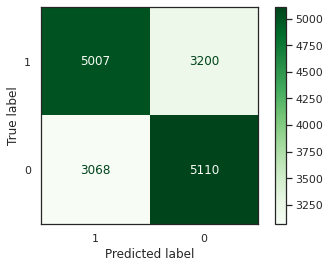

In [ ]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix

plot_confusion_matrix(knn,Z_test,y_test,cmap='Greens',
                      values_format = 'd', display_labels=['1','0'])

#### to have a much easier to see interpretation of polymerised confusion matrix, we create a dataframe.

In [ ]:
cm_df = pd.DataFrame(knn_cm, columns = ['Predicted Positive', 'Predicted Negative'], index =['True Positive','True Negative'])

In [ ]:
cm_df

,Predicted Positive,Predicted Negative
True Positive,5007,3068
True Negative,3200,5110


In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_curve,plot_roc_curve

print(f'the polymerised accuracy_score is {accuracy_score(y_test, y_pred_knn)}')
print(f'the polymerised recall_score is {recall_score(y_test,y_pred_knn)}')
print(f'the polymerised precision_score is {precision_score(y_test, y_pred_knn)}')

the polymerised accuracy_score is 0.6174549893194995
the polymerised recall_score is 0.6248471508926388
the polymerised precision_score is 0.614921780986763


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'True Positive Rate = Sensitivity')

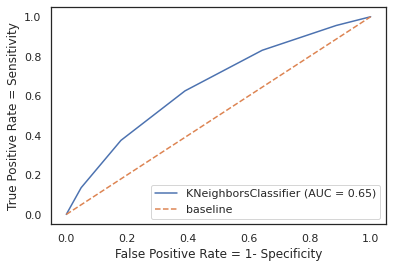

In [ ]:
plot_roc_curve(knn,Z_test,y_test)
plt.plot ([0,1],[0,1],
          label = 'baseline', linestyle='--' )
plt.legend()
plt.xlabel('False Positive Rate = 1- Specificity')
plt.ylabel('True Positive Rate = Sensitivity')

#### Polynormial selection on Trained dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
scaler.fit(app_train_df)

StandardScaler()

In [ ]:
scaled_data=scaler.transform(app_train_df)

In [ ]:
features =['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_EMPLOYED','CREDIT_DAY_OVERDUE','CODE_GENDER','OCCUPATION_TYPE','NAME_EDUCATION_TYPE','NAME_CONTRACT_TYPE','FLAG_OWN_CAR','NAME_HOUSING_TYPE','NAME_INCOME_TYPE']

In [ ]:
# x & y
X = selected_train_df.drop(['TARGET'],axis=1)
y = selected_train_df['TARGET']

#_test Data
X_test = selected_test_df

In [ ]:
X.isnull().sum().sort_values()

NAME_INCOME_TYPE       0
NAME_CONTRACT_TYPE     0
DAYS_BIRTH             0
OCCUPATION_TYPE        0
NAME_HOUSING_TYPE      0
EXT_SOURCE_2           0
DAYS_EMPLOYED          0
CREDIT_DAY_OVERDUE     0
NAME_EDUCATION_TYPE    0
EXT_SOURCE_1           0
EXT_SOURCE_3           0
FLAG_OWN_CAR           0
CODE_GENDER            0
dtype: int64

In [ ]:
X.shape

(307511, 13)

In [ ]:
y.shape

(307511,)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1)
X_rus_1,y_rus_1 = rus.fit_resample(X,y)

In [ ]:
poly=PolynomialFeatures(degree=2,include_bias=False)

In [ ]:
X_fit=poly.fit_transform(X_rus_1)

In [ ]:
X_fit.shape

(49650, 104)

In [ ]:
poly.get_feature_names(X.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['NAME_INCOME_TYPE',
 'NAME_CONTRACT_TYPE',
 'DAYS_BIRTH',
 'OCCUPATION_TYPE',
 'NAME_HOUSING_TYPE',
 'EXT_SOURCE_2',
 'DAYS_EMPLOYED',
 'CREDIT_DAY_OVERDUE',
 'NAME_EDUCATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'FLAG_OWN_CAR',
 'CODE_GENDER',
 'NAME_INCOME_TYPE^2',
 'NAME_INCOME_TYPE NAME_CONTRACT_TYPE',
 'NAME_INCOME_TYPE DAYS_BIRTH',
 'NAME_INCOME_TYPE OCCUPATION_TYPE',
 'NAME_INCOME_TYPE NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE EXT_SOURCE_2',
 'NAME_INCOME_TYPE DAYS_EMPLOYED',
 'NAME_INCOME_TYPE CREDIT_DAY_OVERDUE',
 'NAME_INCOME_TYPE NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE EXT_SOURCE_1',
 'NAME_INCOME_TYPE EXT_SOURCE_3',
 'NAME_INCOME_TYPE FLAG_OWN_CAR',
 'NAME_INCOME_TYPE CODE_GENDER',
 'NAME_CONTRACT_TYPE^2',
 'NAME_CONTRACT_TYPE DAYS_BIRTH',
 'NAME_CONTRACT_TYPE OCCUPATION_TYPE',
 'NAME_CONTRACT_TYPE NAME_HOUSING_TYPE',
 'NAME_CONTRACT_TYPE EXT_SOURCE_2',
 'NAME_CONTRACT_TYPE DAYS_EMPLOYED',
 'NAME_CONTRACT_TYPE CREDIT_DAY_OVERDUE',
 'NAME_CONTRACT_TYPE NAME_EDUCATION_TYPE

In [ ]:
poly_df = pd.DataFrame(X_fit, columns = poly.get_feature_names(X.columns))
#poly_df

In [ ]:
print(f'the polymerised trained data shape was:{X_fit.shape}')
print(f'the unpolymerised trained data shape was:{X.shape}')

the polymerised trained data shape was:(49650, 104)
the unpolymerised trained data shape was:(307511, 13)


In [ ]:
X_train_poly,X_test_poly,y_train_poly,y_test_poly = train_test_split(poly_df,y_rus_1,test_size = 0.33,random_state=42)

In [ ]:
poly_logistic = LogisticRegression(max_iter=3000,class_weight='balanced')

In [ ]:
poly_logistic.fit(X_train_poly, y_train_poly)

LogisticRegression(class_weight='balanced', max_iter=3000)

In [ ]:
print(f' the Trained logistic polymerised score model is {poly_logistic.score(X_train_poly, y_train_poly)}')
print(f' the Test logistic polymerised score model is {poly_logistic.score(X_test_poly, y_test_poly)} ')

 the Trained logistic polymerised score model is 0.49956410641815724
 the Test logistic polymerised score model is 0.5011290814769607 


In [ ]:
print(poly_logistic.intercept_)
print(poly_logistic.coef_)

[2.25177745e-18]
[[ 1.94866488e-17 -8.27390199e-19  1.07985839e-14  2.44531265e-17
   6.44610763e-18 -2.25772566e-18  1.11004841e-14  3.80915923e-19
  -2.95036404e-18 -2.98807166e-19 -1.82593593e-18 -4.84526758e-19
   3.46442432e-18  1.46340548e-16 -3.15293859e-18  1.65026021e-13
   1.87794171e-16  4.45157429e-17 -7.01145446e-18  5.25601094e-14
   1.93847614e-18 -7.18276573e-19  2.50668515e-18 -5.06031189e-18
   5.38678021e-19  2.10473794e-17 -8.27390199e-19 -1.45416799e-14
  -5.83451680e-18 -7.69182063e-19 -6.79579783e-19 -2.83644572e-14
   1.73542872e-20 -2.00927951e-18 -5.23230612e-19 -6.17975072e-19
  -3.85513140e-19 -2.62807232e-19 -1.61615977e-10  1.72363727e-13
   5.85203435e-14 -4.52678532e-14 -8.40707510e-11  5.34392330e-15
  -7.24033078e-14 -1.49904949e-14 -3.94720610e-14 -1.20985463e-14
   4.69105383e-14  2.78592706e-16  6.22951099e-17 -1.54439035e-17
   7.43593365e-14  3.12661711e-18 -7.31320500e-18  7.92619724e-19
  -1.12732477e-17 -3.34063589e-18  2.68243777e-17  2.637216

In [ ]:
poly_logistic.predict(X_test_poly)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_test.shape #33% of data tested

(48744, 13)

#### Polymerised KNN

In [ ]:
X_knn_poly = X_fit
y_knn_poly = y_rus

In [ ]:
print(X_knn_poly.shape)
print(y_knn_poly.shape)

(49650, 104)
(49650,)


In [ ]:
X_train_poly_knn, X_test_poly_knn, y_train_poly_knn, y_test_poly_knn = train_test_split(X_knn_poly, y_knn_poly , random_state=42)

In [ ]:
ss = StandardScaler()
X_train_ss= ss.fit_transform(X_train_poly_knn) 
X_test_ss= ss.transform(X_test_poly_knn)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_ss, y_train_poly_knn)

KNeighborsClassifier()

In [ ]:
print(f'the KNN Trained model score is {knn.score(X_train_ss,y_train_poly_knn)}')

the KNN Trained model score is 0.74573676719392


In [ ]:
print(f'the KNN Test model score is {knn.score(X_test_ss,y_test_poly_knn)}')

the KNN Test model score is 0.6195118021429147


In [ ]:
selected_test_df

,NAME_INCOME_TYPE,NAME_CONTRACT_TYPE,DAYS_BIRTH,OCCUPATION_TYPE,NAME_HOUSING_TYPE,EXT_SOURCE_2,DAYS_EMPLOYED,CREDIT_DAY_OVERDUE,NAME_EDUCATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_3,FLAG_OWN_CAR,CODE_GENDER
0,6,0,-19241,18,1,0.789654,-2329,0.0,1,0.752614,0.159520,0,0
1,6,0,-18064,9,1,0.291656,-4469,0.0,4,0.564990,0.432962,0,1
2,6,0,-20038,4,1,0.699787,-4458,0.0,1,0.506771,0.610991,1,1
3,6,0,-13976,14,1,0.509677,-1866,0.0,4,0.525734,0.612704,0,0
4,6,0,-13040,18,1,0.425687,-2191,0.0,4,0.202145,0.519097,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,6,0,-19970,18,1,0.648575,-5169,0.0,4,0.506771,0.643026,0,0
48740,1,0,-11186,14,1,0.684596,-1149,0.0,4,0.506771,0.519097,0,0
48741,1,0,-15922,18,1,0.632770,-3037,0.0,4,0.733503,0.283712,1,0
48742,1,0,-13968,10,1,0.445701,-2731,0.0,1,0.373090,0.595456,0,1


####Confusion Matrix

In [ ]:
y_poly_predict = knn.predict(X_test_ss)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
poly_cm = confusion_matrix(y_test_poly_knn,y_poly_predict)
poly_cm

array([[3799, 2378],
       [2345, 3891]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_poly_knn,y_poly_predict).ravel()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


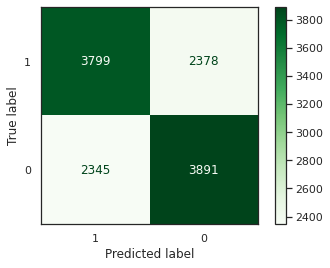

In [ ]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix

plot_confusion_matrix(knn,X_test_ss,y_test_poly_knn,cmap='Greens',
                      values_format = 'd', display_labels=['1','0'])

#### to have a much easier to see interpretation of polymerised confusion matrix, we create a dataframe.

In [ ]:
poly_cm_df = pd.DataFrame(poly_cm, columns = ['Predicted Positive', 'Predicted Negative'], index =['True Positive','True Negative'])

In [ ]:
poly_cm_df

,Predicted Positive,Predicted Negative
True Positive,3799,2378
True Negative,2345,3891


In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_curve,plot_roc_curve

print(f'the polymerised accuracy_score is {accuracy_score(y_test_poly_knn, y_poly_predict)}')
print(f'the polymerised recall_score is {recall_score(y_test_poly_knn,y_poly_predict)}')
print(f'the polymerised precision_score is {precision_score(y_test_poly_knn, y_poly_predict)}')

the polymerised accuracy_score is 0.6195118021429147
the polymerised recall_score is 0.6239576651699807
the polymerised precision_score is 0.6206731536130164


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'True Positive Rate = Sensitivity')

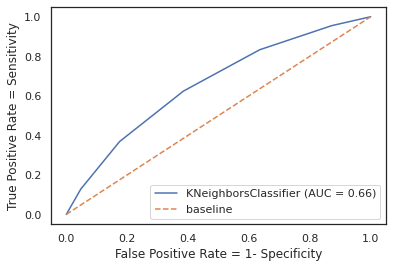

In [ ]:
plot_roc_curve(knn,X_test_ss,y_test_poly_knn)
plt.plot ([0,1],[0,1],
          label = 'baseline', linestyle='--' )
plt.legend()
plt.xlabel('False Positive Rate = 1- Specificity')
plt.ylabel('True Positive Rate = Sensitivity')

**Handling Imbalanced Data**

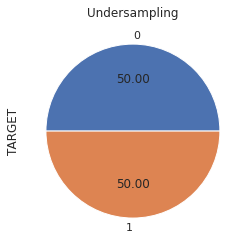

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1)
X_rus,y_rus = rus.fit_resample(X,y)

ax = y_rus.value_counts().plot.pie(autopct='%.2f')

_ = ax.set_title("Undersampling")

In [ ]:
# Train Test Split
X_train, X_val, y_train, y_val = train_test_split(X_rus, y_rus, random_state = 42, test_size=0.3)

In [ ]:
# Step 2: Instantiate our model.

logreg = LogisticRegression(max_iter=3000,class_weight='balanced')

In [ ]:
# Step 3: Fit our model.

logreg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=3000)

In [ ]:
print(logreg.intercept_)
print(logreg.coef_)

[5.83192111e-10]
[[ 5.64552533e-09 -3.10748496e-10  1.27023390e-06  6.75531651e-09
   1.80562116e-09 -8.05098240e-10 -1.35075373e-06  1.16332345e-10
  -9.94240320e-10 -1.51178340e-10 -6.30758997e-10 -1.94144780e-10
   1.03775605e-09]]


In [ ]:
# Step 4 (part 1): Generate predicted values.

y_pred = logreg.predict(X_val)
print(y_pred)

[1 0 1 ... 0 1 1]


In [ ]:
y_pred_df = pd.DataFrame(y_pred)

In [ ]:
y_pred_df.count()

0    14895
dtype: int64

In [ ]:
# Step 4 (part 2): Generate predicted probabilities.
np.round(logreg.predict_proba(X_val),2)
print(y_pred)

[1 0 1 ... 0 1 1]


In [ ]:
y_pred_df.count()

0    14895
dtype: int64

In [ ]:
X_val.head()

,NAME_INCOME_TYPE,NAME_CONTRACT_TYPE,DAYS_BIRTH,OCCUPATION_TYPE,NAME_HOUSING_TYPE,EXT_SOURCE_2,DAYS_EMPLOYED,CREDIT_DAY_OVERDUE,NAME_EDUCATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_3,FLAG_OWN_CAR,CODE_GENDER
5048,7,0,17181,8,1,0.650188,-440,0.0,1,0.505998,0.440058,0,1
21895,3,0,22134,8,1,0.715126,365243,0.0,3,0.505998,0.387625,0,0
12005,7,0,14536,8,2,0.173405,-623,0.0,1,0.505998,0.239226,1,0
5762,4,0,19455,2,1,0.477979,-5140,0.0,1,0.805748,0.535276,0,0
4579,7,0,17577,0,1,0.792750,-2039,0.0,3,0.505998,0.470456,0,0


In [ ]:
y_pred.shape

(14895,)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_val, y_pred)
print(confusion_matrix)

[[1402 6034]
 [ 941 6518]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.19      0.29      7436
           1       0.52      0.87      0.65      7459

    accuracy                           0.53     14895
   macro avg       0.56      0.53      0.47     14895
weighted avg       0.56      0.53      0.47     14895



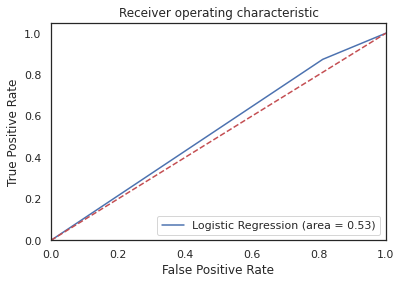

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_val, y_pred)
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
# Step 5: Evaluate model.
print("Train Score is",np.round(logreg.score(X_train,y_train)*100,2),"%")
print("Test Score is",np.round(logreg.score(X_val,y_val)*100,2),"%")

Train Score is 53.55 %
Test Score is 53.17 %


In [ ]:
X_test.shape

(48744, 13)

In [ ]:
log_reg_pred = logreg.predict_proba(X_test)[:,1]

In [ ]:
submit = app_test_df[['SK_ID_CURR']]
submit['TARGET Proba'] = log_reg_pred

submit.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SK_ID_CURR,TARGET Proba
0,100001,0.494677
1,100005,0.495773
2,100013,0.495142
3,100028,0.496192
4,100038,0.496599


# **PCA Transformation**

In [ ]:
app_train_df.shape

(307511, 123)

In [ ]:
# x & y
X = selected_train_df.drop(['TARGET'],axis=1)
y = selected_train_df['TARGET']

#_test Data
X_test = selected_test_df
X_test

,NAME_INCOME_TYPE,NAME_CONTRACT_TYPE,DAYS_BIRTH,OCCUPATION_TYPE,NAME_HOUSING_TYPE,EXT_SOURCE_2,DAYS_EMPLOYED,CREDIT_DAY_OVERDUE,NAME_EDUCATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_3,FLAG_OWN_CAR,CODE_GENDER
0,6,0,-19241,18,1,0.789654,-2329,0.0,1,0.752614,0.159520,0,0
1,6,0,-18064,9,1,0.291656,-4469,0.0,4,0.564990,0.432962,0,1
2,6,0,-20038,4,1,0.699787,-4458,0.0,1,0.506771,0.610991,1,1
3,6,0,-13976,14,1,0.509677,-1866,0.0,4,0.525734,0.612704,0,0
4,6,0,-13040,18,1,0.425687,-2191,0.0,4,0.202145,0.519097,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,6,0,-19970,18,1,0.648575,-5169,0.0,4,0.506771,0.643026,0,0
48740,1,0,-11186,14,1,0.684596,-1149,0.0,4,0.506771,0.519097,0,0
48741,1,0,-15922,18,1,0.632770,-3037,0.0,4,0.733503,0.283712,1,0
48742,1,0,-13968,10,1,0.445701,-2731,0.0,1,0.373090,0.595456,0,1


In [ ]:
X.isnull().sum().sort_values()

NAME_INCOME_TYPE       0
NAME_CONTRACT_TYPE     0
DAYS_BIRTH             0
OCCUPATION_TYPE        0
NAME_HOUSING_TYPE      0
EXT_SOURCE_2           0
DAYS_EMPLOYED          0
CREDIT_DAY_OVERDUE     0
NAME_EDUCATION_TYPE    0
EXT_SOURCE_1           0
EXT_SOURCE_3           0
FLAG_OWN_CAR           0
CODE_GENDER            0
dtype: int64

In [ ]:
# changing NA in objects to mode (most occurence object)
for tr_ci in X.describe().columns:
    X[tr_ci]=X[tr_ci].fillna((X[tr_ci].median()))

In [ ]:
X.isnull().sum().sort_values()

NAME_INCOME_TYPE       0
NAME_CONTRACT_TYPE     0
DAYS_BIRTH             0
OCCUPATION_TYPE        0
NAME_HOUSING_TYPE      0
EXT_SOURCE_2           0
DAYS_EMPLOYED          0
CREDIT_DAY_OVERDUE     0
NAME_EDUCATION_TYPE    0
EXT_SOURCE_1           0
EXT_SOURCE_3           0
FLAG_OWN_CAR           0
CODE_GENDER            0
dtype: int64

In [ ]:
print(X.shape)
print(y.shape)
print(X_test.shape)

(307511, 13)
(307511,)
(48744, 13)


In [ ]:
#Scale Train Data
scaler=StandardScaler()
scaler.fit(X)
scaled_train_data=scaler.transform(X)

In [ ]:
#Scale Test Data
scaler=StandardScaler()
scaler.fit(X_test)
scaled_test_data=scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=6)

In [ ]:
pca.fit(scaled_train_data)
x_train_pca=pca.transform(scaled_train_data)

In [ ]:
scaled_train_data.shape

(307511, 13)

In [ ]:
x_train_pca.shape

(307511, 6)

In [ ]:
pca.fit(scaled_test_data)
x_test_pca=pca.transform(scaled_test_data)

In [ ]:
scaled_train_data

array([[ 0.91557976, -0.32439532, -1.50687967, ..., -2.15365094,
        -0.71791354,  1.38817559],
       [-0.26342414, -0.32439532,  0.16682127, ...,  0.1120628 ,
        -0.71791354, -0.72036996],
       [ 0.91557976,  3.08265852,  0.68950909, ...,  1.22397489,
         1.39292539,  1.38817559],
       ...,
       [ 0.91557976, -0.32439532, -0.24541696, ..., -1.69877295,
        -0.71791354, -0.72036996],
       [-1.44242804, -0.32439532, -0.93400832, ...,  0.8317067 ,
        -0.71791354, -0.72036996],
       [-1.44242804, -0.32439532,  0.18767379, ..., -2.29931907,
        -0.71791354, -0.72036996]])

In [ ]:
x_train_pca

array([[ 2.986389  ,  2.31609547, -0.82210001,  0.95129627,  0.15300219,
        -0.39137237],
       [ 0.1898546 , -0.77967149,  1.24459488,  0.1627976 ,  0.18344489,
        -1.25725558],
       [ 0.6457743 , -1.25473623, -1.09580644, -1.12629177,  0.17422891,
         1.85173201],
       ...,
       [ 0.0563792 , -0.31351522,  2.08160321,  0.36000005, -1.23860139,
         0.19736233],
       [-0.31369872,  0.31821687,  0.48038616, -0.52002461,  0.49257569,
        -0.15439586],
       [-0.79321671, -1.16280416,  2.27856721,  1.46947042,  0.03080554,
         0.11433065]])

In [ ]:
x_test_pca

array([[-0.7389678 , -1.55755625, -1.39700302,  1.54920066, -0.30889663,
        -0.32055419],
       [ 0.61670841,  0.81851968,  0.02672478, -0.72612578, -0.98138428,
         0.57545936],
       [ 1.13346213, -2.19186855,  1.4253507 , -0.16344115, -0.42482788,
        -0.19544516],
       ...,
       [-0.87095758, -0.65086013,  0.51728732,  0.96911721, -0.45682581,
        -0.25200342],
       [ 0.64614321, -0.21159648,  0.67283079,  0.56144101,  1.05585208,
        -0.30432591],
       [ 1.53468283, -0.06207169, -0.28073096,  0.07409793, -1.11446723,
         0.35711852]])

Text(0, 0.5, 'Second principle component')

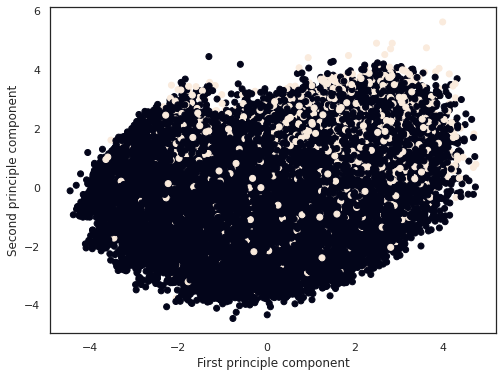

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],c=y)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [ ]:
print(pca.explained_variance_ratio_)

[0.20015856 0.1030991  0.09366172 0.08542206 0.08019727 0.07638289]


In [ ]:
print(pca.singular_values_)

[356.138839   255.59932706 243.62021015 232.65761808 225.43017126
 220.00385994]


In [ ]:
# Train Test Split
X_train_PCA, X_val_PCA, y_train_PCA, y_val_PCA = train_test_split(x_train_pca, y, random_state = 42, test_size=0.3)

In [ ]:
# Step 2: Instantiate our model.

logreg = LogisticRegression(max_iter=3000,class_weight='balanced')

In [ ]:
# Step 3: Fit our model.

logreg.fit(X_train_PCA,y_train_PCA)

LogisticRegression(class_weight='balanced', max_iter=3000)

In [ ]:
logreg.score(X_train_PCA,y_train_PCA)

0.6782915305890168

In [ ]:
logreg.score(X_val_PCA,y_val_PCA)

0.6783228911483513

In [ ]:
print(logreg.intercept_)
print(logreg.coef_)

[-0.25515582]
[[ 0.28003603  0.50646047 -0.1335615   0.31028149 -0.0223099  -0.12328772]]


In [ ]:
# Step 4 (part 1): Generate predicted values.

y_pred = logreg.predict(X_val_PCA)
print(y_pred)

[1 0 1 ... 0 0 1]


In [ ]:
y_pred_df = pd.DataFrame(y_pred)

In [ ]:
# Step 4 (part 2): Generate predicted probabilities.
np.round(logreg.predict_proba(X_val_PCA),2)
print(y_pred)

[1 0 1 ... 0 0 1]


In [ ]:
y_pred_df.count()

0    92254
dtype: int64

In [ ]:
X_val.shape

(14895, 13)

In [ ]:
y_pred.shape

(92254,)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_val_PCA, y_pred)
print(confusion_matrix)

[[57755 27086]
 [ 2590  4823]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val_PCA, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.68      0.80     84841
           1       0.15      0.65      0.25      7413

    accuracy                           0.68     92254
   macro avg       0.55      0.67      0.52     92254
weighted avg       0.89      0.68      0.75     92254



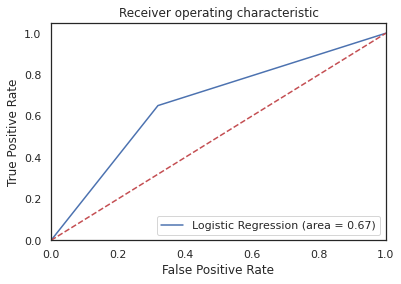

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_val_PCA, y_pred)
fpr, tpr, thresholds = roc_curve(y_val_PCA, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
# Step 5: Evaluate model.
print("Train Score is",np.round(logreg.score(X_train_PCA,y_train_PCA)*100,2),"%")
print("Test Score is",np.round(logreg.score(X_val_PCA,y_val_PCA)*100,2),"%")

Train Score is 67.83 %
Test Score is 67.83 %


In [ ]:
x_test_pca.shape

(48744, 6)

In [ ]:
log_reg_pred = logreg.predict_proba(x_test_pca)[:,1]

In [ ]:
submit = app_test_df[['SK_ID_CURR']]
submit['TARGET Proba'] = log_reg_pred

submit.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SK_ID_CURR,TARGET Proba
0,100001,0.368828
1,100005,0.513539
2,100013,0.221775
3,100028,0.422338
4,100038,0.605321


# **KNN - PCA**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

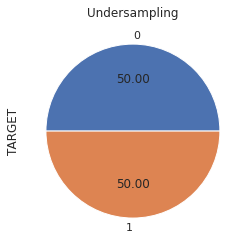

In [ ]:
rus_pca = RandomUnderSampler(sampling_strategy=1)
X_rus_pca,y_rus_pca = rus.fit_resample(x_train_pca,y)

ax = y_rus.value_counts().plot.pie(autopct='%.2f')

_ = ax.set_title("Undersampling")

In [ ]:
sc = StandardScaler()
Z_train_PCA = sc.fit_transform(X_train_PCA)
Z_test_PCA = sc.transform(X_val_PCA)

In [ ]:
knn_PCA = KNeighborsClassifier()

In [ ]:
cross_val_score(knn_PCA,Z_train_PCA,y_train_PCA,cv=7).mean()

0.9114082236582316

In [ ]:
knn_PCA.fit(Z_train_PCA,y_train_PCA)

KNeighborsClassifier()

In [ ]:
knn_PCA.score(Z_train_PCA,y_train_PCA)

0.9231012231890252

In [ ]:
knn_PCA.score(Z_test_PCA,y_val_PCA)

0.9121230515749995

In [ ]:
y_pred_knn = knn_PCA.predict(Z_test_PCA)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
np.unique(y_pred_knn,return_counts= True)

(array([0, 1]), array([90826,  1428]))

In [ ]:
Z_test_PCA.shape

(92254, 6)

In [ ]:
Z_train_PCA.shape

(215257, 6)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_val_PCA, y_pred_knn)
print(confusion_matrix)

[[83780  1061]
 [ 7046   367]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


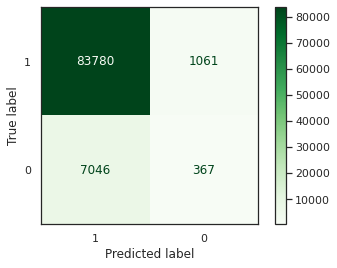

In [ ]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix

plot_confusion_matrix(knn_PCA,Z_test_PCA,y_val_PCA,cmap='Greens',
                      values_format = 'd', display_labels=['1','0'])

#### to have a much easier to see interpretation of polymerised confusion matrix, we create a dataframe.

In [ ]:
cm_pca_df = pd.DataFrame(confusion_matrix, columns = ['Predicted Positive', 'Predicted Negative'], index =['True Positive','True Negative'])

In [ ]:
cm_pca_df

,Predicted Positive,Predicted Negative
True Positive,83780,1061
True Negative,7046,367


In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_curve,plot_roc_curve

print(f'the polymerised accuracy_score is {accuracy_score(y_val_PCA, y_pred_knn)}')
print(f'the polymerised recall_score is {recall_score(y_val_PCA,y_pred_knn)}')
print(f'the polymerised precision_score is {precision_score(y_val_PCA, y_pred_knn)}')

the polymerised accuracy_score is 0.9121230515749995
the polymerised recall_score is 0.049507621745582084
the polymerised precision_score is 0.25700280112044815


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'True Positive Rate = Sensitivity')

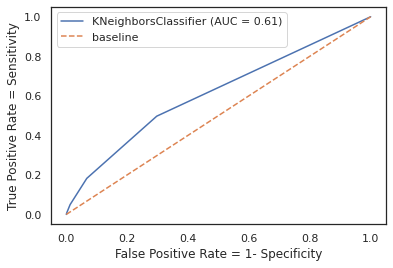

In [ ]:
plot_roc_curve(knn_PCA,Z_test_PCA,y_val_PCA)
plt.plot ([0,1],[0,1],
          label = 'baseline', linestyle='--' )
plt.legend()
plt.xlabel('False Positive Rate = 1- Specificity')
plt.ylabel('True Positive Rate = Sensitivity')